# $\longrightarrow$ LIE GROUP REPRESENTATION ESTIMATION $\longleftarrow$

**Note:** Our algorithm may not converge every time, therefore it may be necessary to run it multiple times to obtain satisfactory results. This is due to the possibility of getting stuck in local minimum, while using the *Stiefel* of *Grassmann* method.

# Functions

In [1]:
import liedetect
import sklearn, scipy
import matplotlib.pyplot as plt
import velour
import numpy as np
import skdim

# Experiments I - Torus

## I-1: Representation of $\mathrm{SO}(2)$

### I-1-a: Representation of $\mathrm{SO}(2)$ in $\mathbb{R}^4$

We start with a simple example: a representation of $\mathrm{SO}(2)$ in dimension $4$.
Our goal is to recover the frequencies of the representation. We first generate the point cloud.

-----> Representation of T^1 in R^4 with frequencies ((4, -2),)


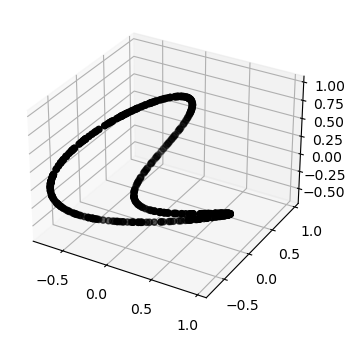

In [2]:
' Generate dataset '

# Parameters
ambient_dim = 4     # ambient dimension
dim = 1             # dimension of the torus (here, circle)
n_points = 500      # number of sample points
frequency_max = 4   # maximal angle parameter

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                                           conjugate=True, right_multiply=True, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');

Next, we apply Lie-PCA. Two methods are available: with local covariance, that do not use pruning of the eigenvectors, and with local PCA, that does. On both methods, we already see that the Lie-PCA operator has one significantly small eigenvalue. This is an indicator of the fact that the underlying orbit is generated by $\mathrm{SO}(2)$.

In [3]:
' Lie-PCA '

n_neighbors = 10
method='localcovariance'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

----> Lie PCA with localcovariance estimation of tangent spaces <----
First eigenvalues: [0.00020988919950475624, 0.11029768408383125, 0.11806553689081489, 0.12118066672134994]
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0002030552637801885, 0.11095857909942963, 0.11866826394319833, 0.12206513462665863]


We now find the Lie algebra more likely to generate the orbit underlying the point cloud, based on the Lie-PCA operator. 
To this end, we implemented three methods: one consists in an optimisation on $\mathrm{O}(n)\times\mathrm{O}(d)$, one on $\mathrm{O}(n)$, and the last one is based in the normal form decomposition of the skew-symmetric matrices.
We see that the three methods allow to recover exactly the frequencies, and give an accurate estimation of the underlying orbit.

----> Optimization problem via Stiefel for torus group <----
Number of frequencies to test: 5
Solve minimization problem... It 5/5. Duration 0:00:34 Expected remaining time 0:00:00.
The optimal frequencies found is ((1, 2),) with cost 1.0839472086182193e-06
----> The frequencies ((4, -2),) and ((1, 2),) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0559


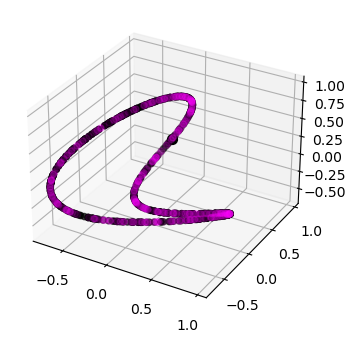

----> Optimization problem via Grassmann for torus group <----
Number of frequencies to test: 5
Solve minimization problem... It 5/5. Duration 0:00:13 Expected remaining time 0:00:00.
The optimal frequencies found is ((1, 2),) with cost 1.0142712468049593e-05
----> The frequencies ((4, -2),) and ((1, 2),) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0375


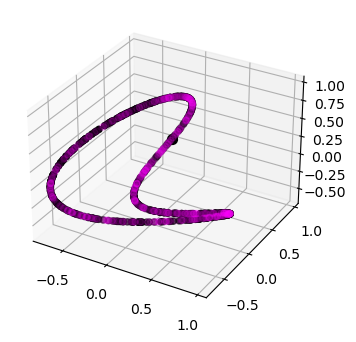

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 5
The optimal frequencies found is ((1, 2),) with cost 0.0022519685407035883
----> The frequencies ((4, -2),) and ((1, 2),) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0468


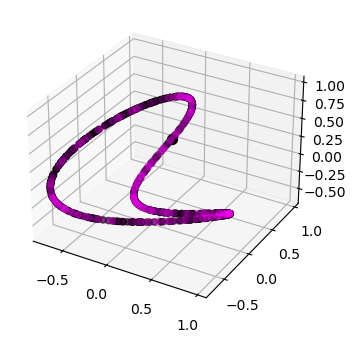

In [4]:
' Project on Lie subalgebras '

for method in ['Stiefel', 'Grassmann', 'NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=1)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', alpha = 0.1); plt.show();

### I-1-b: Representation of $\mathrm{SO}(2)$ in $\mathbb{R}^6$

We reproduce the same experiment, $\mathrm{SO}(2)$ being now represented in dimension $6$.

-----> Representation of T^1 in R^6 with frequencies ((1, -4, 2),)


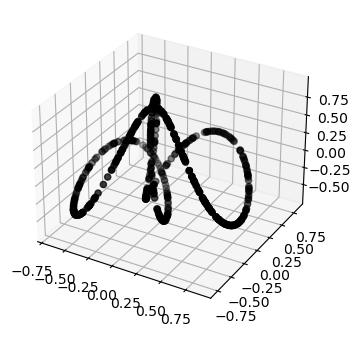

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.000559602231624045, 0.06902341837913192, 0.0732247151364096, 0.07944176601505905]


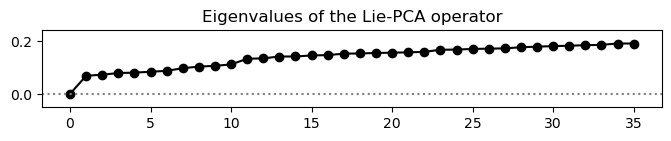

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 4
The optimal frequencies found is ((1, 2, 4),) with cost 0.00955958744350194
----> The frequencies ((1, -4, 2),) and ((1, 2, 4),) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1352


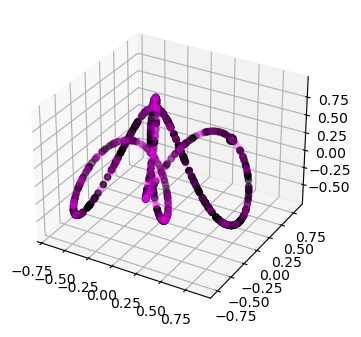

In [5]:
' Generate dataset '

# Parameters
ambient_dim = 6     # ambient dimension
dim = 1             # dimension of the torus (here, circle)
n_points = 500      # number of sample points
frequency_max = 4   # maximal angle parameter

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                                           conjugate=True, right_multiply=True, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();

' Lie-PCA '

n_neighbors = 10
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann', 'NormalForm']:
for method in ['NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=1)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', alpha = 0.1); plt.show();

### I-1-c: PCA pre-processing

The consistency of our method is based on the assumption that the underlying orbit lives in a minimal-dimensional subspace. If not, the isometry group $\mathrm{Isom}(\mathcal{O})$ is not equal to the symmetry group $\mathrm{Sym}(\mathcal{O})$, and our algorithm may return inconsistent Lie algebras.
This is the case for the point cloud below.

-----> Representation of T^1 in R^6 with frequencies ((1, 1, 2),)


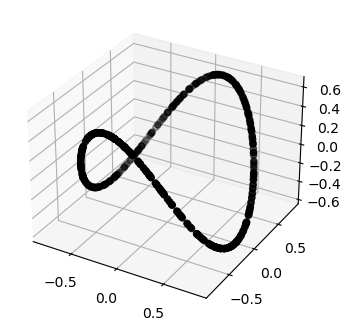

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [-8.682731974558928e-17, -4.1488163371340037e-17, -3.0270601166740076e-17, -1.5694691076968434e-17]


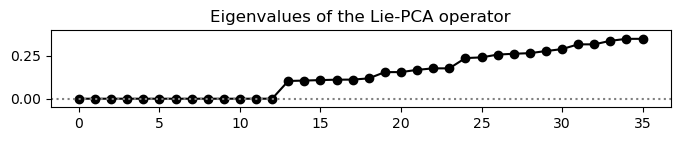

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 4
The optimal frequencies found is ((1, 2, 4),) with cost 0.3541248803586789
----> The frequencies ((1, 1, 2),) and ((1, 2, 4),) are not equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 1.1547


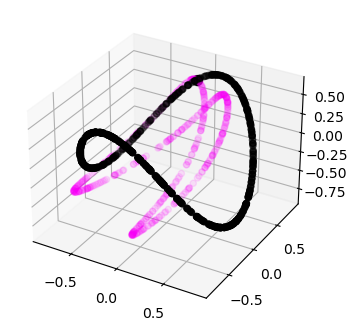

In [6]:
' Generate dataset '

# Parameters
ambient_dim = 6     # ambient dimension
dim = 1             # dimension of the torus (here, circle)
n_points = 500      # number of sample points
frequency_max = 4   # maximal angle parameter
Frequencies = ((1,1,2),) # prescribed frequencies

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                                           conjugate=True, right_multiply=True, verbose=True,
                                           frequencies=Frequencies)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();

' Lie-PCA '

n_neighbors = 10
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann', 'NormalForm']:
for method in ['NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=1)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', alpha = 0.1); plt.show();

In order to remedy to this problem, we project the point cloud in a minimal-dimensional subspace.
Applying our algorithm again gives accurate results.

Projection in dimension 4 - PCA eigenvalues: [6.321735587567477e-32, 8.095042417835155e-32, 0.15544501261681506, 0.17689812592757842, 0.31758546332804966, 0.35007139812755683]


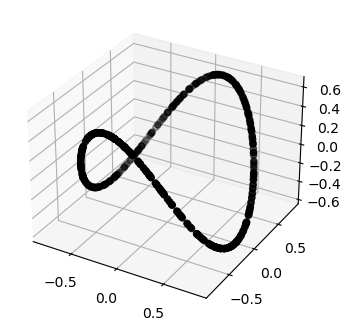

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0003525287409630873, 0.10456673017225943, 0.10539136327239972, 0.10766562998636327]


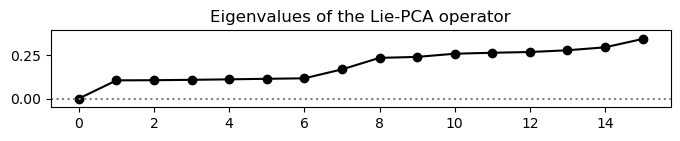

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 5
The optimal frequencies found is ((1, 2),) with cost 0.0012893762748010748
----> The frequencies ((1, 2),) and ((1, 2),) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0635


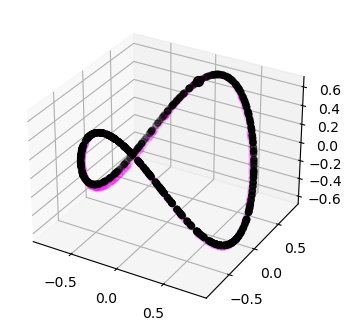

In [7]:
' Project in minimal-dimensional subspace '

# Prune small PCA eigenvalues
eps_pca = 1e-10
pca = sklearn.decomposition.PCA(n_components=ambient_dim); pca.fit(X)
dim_pca = sum(pca.explained_variance_ratio_>eps_pca)
print('Projection in dimension', dim_pca, '- PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

# Dimension reduction via PCA
pca = sklearn.decomposition.PCA(n_components=dim_pca); 
X = pca.fit_transform(X)
ambient_dim = dim_pca

# Define new frequencies (groundtruth)
Frequencies = ((1,2),)

# Plot new orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();


' Lie-PCA '

n_neighbors = 10
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann', 'NormalForm']:
for method in ['NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=1)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', alpha = 0.1); plt.show();

## I-2: Representation of $T^2$

### I-2-a: Representation of $T^2$ in $\mathbb{R}^6$

-----> Representation of T^2 in R^6 with frequencies ((-2, -1, 0), (2, 0, -2))


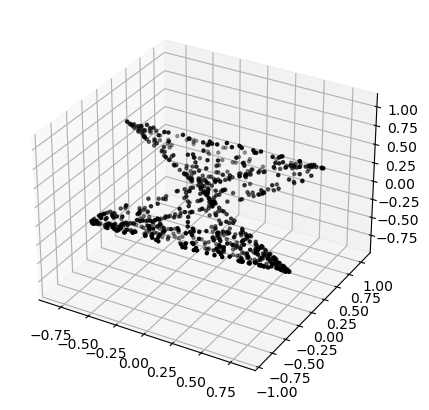

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0023744543162922127, 0.0025799021845366497, 0.0502146439453318, 0.05501474632214757]


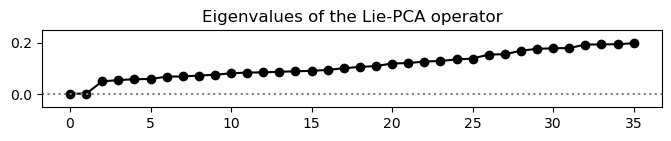

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 18
The optimal frequencies found is ((0, 1, 1), (-1, -2, 0)) with cost 0.04422461042736187
----> The frequencies ((-2, -1, 0), (2, 0, -2)) and ((0, 1, 1), (-1, -2, 0)) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0618


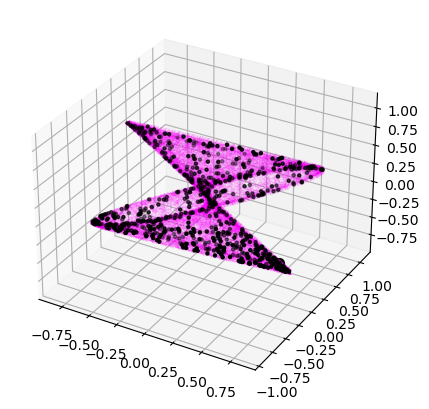

In [8]:
' Generate dataset '

# Parameters
ambient_dim = 6     # ambient dimension
dim = 2             # dimension of the torus (here, circle)
n_points = 750      # number of sample points
frequency_max = 2   # maximal angle parameter

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                                           conjugate=True, right_multiply=True, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

' Lie-PCA '

n_neighbors = 15
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann', 'NormalForm']:
for method in ['NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=1)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 150
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5);
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
#     ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', lw=10); plt.show();
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.1,marker="3"); plt.show();

### I-2-b: Representation of $T^2$ in $\mathbb{R}^8$

**Warning:** The following cell takes a lot of time to run. This is because of the orbit generation, which consists of $200\times 200\times 200$ points.

-----> Representation of T^2 in R^8 with frequencies ((-1, -2, 1, 2), (-1, 1, -1, 2))


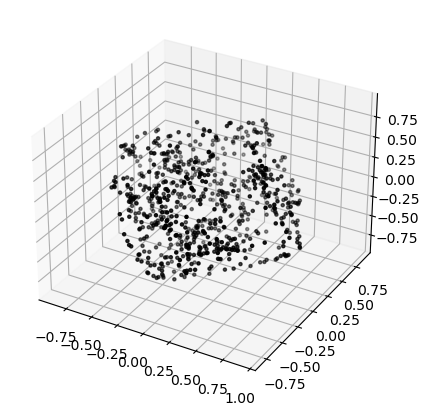

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.026982091895011412, 0.04342067258741312, 0.04583899718625693, 0.04819728963062252]


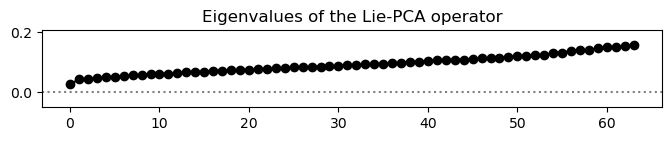

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 78
Test commutation: 0.381470523991578
Normalized frequencies found in normal form decomposition: ((-0.4954242162231528, -0.11567246490142842, -0.3627089256771205, -0.06633207026479707), (0.19120403632434294, -0.12842583176093872, -0.2540848619578943, 0.5640933904343406))
There are 29952 expanded frequencies to test, out of 78
The optimal frequencies found is ((1, 0, 0, 1), (1, 1, 2, -2)) with cost 0.15924438674647615
Frequencies ((0, 0, 1, 1), (1, 2, -2, 1)) - score 0.15924 (best cost #1/78)
Frequencies ((0, 1, 1, 2), (1, -2, 2, -1)) - score 0.19788 (best cost #2/78)
Frequencies ((0, 0, 1, 1), (1, 2, -2, 0)) - score 0.24166 (best cost #3/78)
Frequencies ((0, 1, 1, 2), (1, -2, 2, 0)) - score 0.2461 (best cost #4/78)
Frequencies ((0, 1, 2, 2), (1, -2, -1, 2)) - score 0.27787 (best cost #5/78)
Frequencies ((0, 0, 1, 1), (1, 2, -2, 2)) - score 0.3096 (best cost #6/78)
Frequencies ((0, 1, 1, 2), 

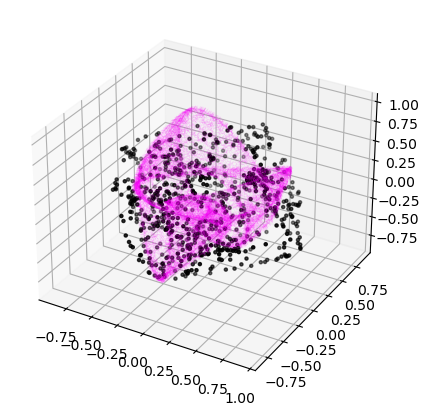

In [9]:
' Generate dataset '

# Parameters
ambient_dim = 8     # ambient dimension
dim = 2             # dimension of the torus (here, circle)
n_points = 750      # number of sample points
frequency_max = 2   # maximal angle parameter

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                                           conjugate=True, right_multiply=True, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

' Lie-PCA '

n_neighbors = 15
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann', 'NormalForm']:
for method in ['NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=2)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 100
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5);
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
#     ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', lw=10); plt.show();
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.1,marker="3"); plt.show();

## I-2: Representation of $T^3$ in $\mathbb{R}^6$

-----> Representation of T^3 in R^6 with frequencies ((0, 3, 2), (0, 3, -3), (-2, 2, 0))


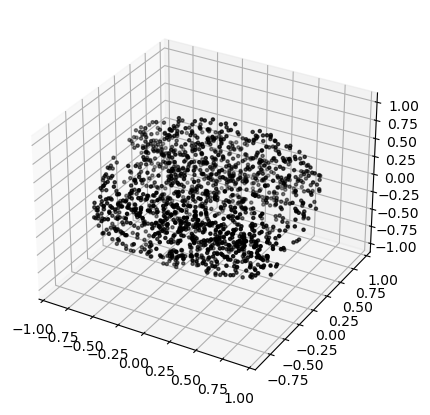

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0035343076418337485, 0.00392284469128565, 0.004042556735271638, 0.06397822413717562]


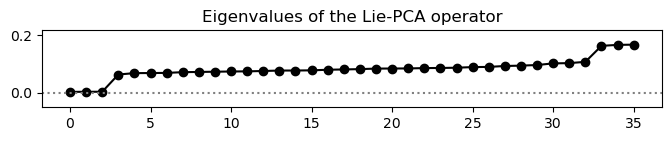

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 1
Test commutation: 0.009412586158819234
Normalized frequencies found in normal form decomposition: ((0.3467059522088751, -0.6105198706764313, 0.08332361235403964), (0.616122225545187, 0.34189681163626634, -0.058236250433126364), (0.010080254335144057, 0.10129069385183047, 0.6996421852172103))
There are 48 expanded frequencies to test, out of 1
The optimal frequencies found is ((0, 0, 1), (0, 1, -3), (1, -3, -3)) with cost 3.369943137647543e-16
Frequencies ((0, 0, 1), (0, 1, -3), (1, -3, -3)) - score 0.0 (best cost #1/1)
----> The frequencies ((0, 3, 2), (0, 3, -3), (-2, 2, 0)) and ((0, 0, 1), (0, 1, -3), (1, -3, -3)) are equivalent <----
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0891


In [10]:
' Generate dataset '

# Parameters
ambient_dim = 6     # ambient dimension
dim = 3             # dimension of the torus (here, circle)
n_points = 1500     # number of sample points
frequency_max = 3   # maximal angle parameter

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnTorus(dim=dim, ambient_dim=ambient_dim, n_points=n_points, frequency_max=frequency_max,
                                           conjugate=True, right_multiply=True, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

' Lie-PCA '

n_neighbors = 15
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann', 'NormalForm']:
for method in ['NormalForm']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,frequency_max=frequency_max,
                                                                  method=method,verbosity=2)
    
    # Check if found frequencies are correct
    liedetect.lie_optimization.AreFrequencesEquivalent(Frequencies,OptimalFrequencies,verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 50
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))

## Experiment I-4: $\mathrm{SU(2)}$ and $\mathrm{SO}(3)$

### I-4-a: Representation of $\mathrm{SO}(3)$ in $\mathbb{R}^5$

-----> Representation of SU(2) in R^5 with partition [5]
Coefficient: 0.5


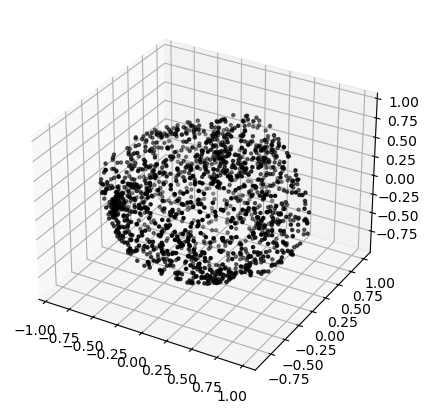

Dimension estimation with 0.05% of neighbors: 3.4223 and 4.002
Dimension estimation with 0.1% of neighbors: 3.472 and 4.376
Chosen dimension estimation: 2
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.061684450671288416, 0.07279628414653867, 0.0755008608494459, 0.089443750701442]


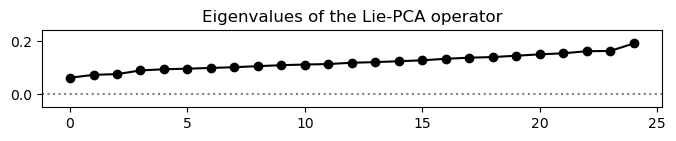

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 3/3. Duration 0:00:29 Expected remaining time 0:00:00.
The optimal frequencies found is (5,) with cost 0.016883974969731968
Frequencies (5,) - score 0.01688 (best cost #1/3)
Frequencies (1, 1, 3) - score 0.02847 (best cost #2/3)
Frequencies (1, 4) - score 0.03506 (best cost #3/3)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1129


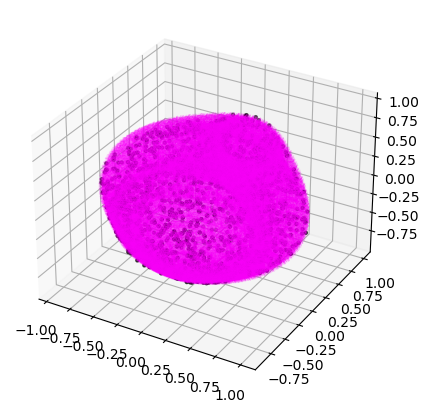

In [11]:
' Generate dataset '

# Parameters
ambient_dim = 5     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 1500     # number of sample points

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[5],
                                           conjugate=False, right_multiply=False, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

# Estimate intrinsic dimension with scikit-dimension
for ratio_neighbors in [0.05,0.1]:
    danco = skdim.id.DANCo().fit(X)
    lpca = skdim.id.lPCA().fit_pw(X, n_neighbors = int(n_points*ratio_neighbors), n_jobs = -1)
    print('Dimension estimation with '+repr(ratio_neighbors)+'% of neighbors:', round(danco.dimension_,4), 'and', round(np.mean(lpca.dimension_pw_),4))
#dim_orbit = int(np.rint(np.mean(lpca.dimension_pw_))) # dimension of the orbit
dim_orbit = 2 # dimension of the orbit
print('Chosen dimension estimation:', dim_orbit)

' Lie-PCA '

n_neighbors = 50
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim_orbit,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann']:
for method in ['Stiefel']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,frequency_max=None,
                                                                  method=method,verbosity=2)
    
    # Generate estimated orbit
    n_points_orbit = 50
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5);
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
#     ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', lw=10); plt.show();
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.1,marker="3"); plt.show();    

### I-4-b: Representation of $\mathrm{SU}(2)$ in $\mathbb{R}^7$

-----> Representation of SU(2) in R^7 with partition [3, 4]
Coefficient: 1.0


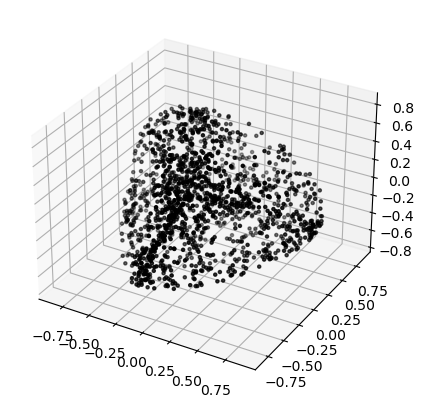

Dimension estimation with 0.05% of neighbors: 3.2858 and 3.522
Dimension estimation with 0.1% of neighbors: 3.4494 and 4.8867
Chosen dimension estimation: 2
----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.026086355026786454, 0.045726732317952504, 0.05104286614307281, 0.05921597526327896]


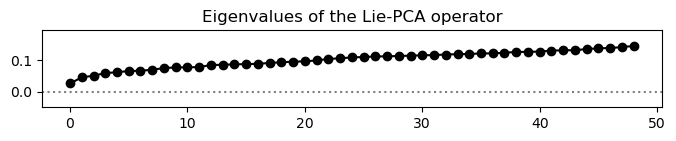

----> Optimization problem via Stiefel for SU(2) group <----
Solve minimization problem... It 6/6. Duration 0:27:09 Expected remaining time 0:00:00.
The optimal frequencies found is (1, 3, 3) with cost 0.011120870220586433
Frequencies (1, 3, 3) - score 0.01112 (best cost #1/6)
Frequencies (1, 1, 5) - score 0.01206 (best cost #2/6)
Frequencies (7,) - score 0.0135 (best cost #3/6)
Frequencies (3, 4) - score 0.0152 (best cost #4/6)
Frequencies (1, 1, 1, 1, 3) - score 0.01577 (best cost #5/6)
Frequencies (1, 1, 1, 4) - score 0.02366 (best cost #6/6)
Non-symmetric Hausdorff distance from X to estimated orbit: 1.554


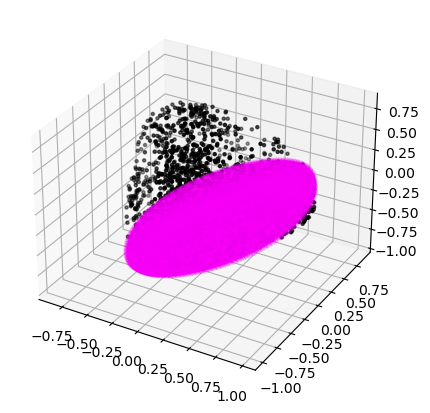

In [12]:
' Generate dataset '

# Parameters
ambient_dim = 7     # ambient dimension
group = 'SU(2)'     # Lie group considered
dim = 3             # dimension of the group
n_points = 1500     # number of sample points

# Generate dataset and plot
X, LieAlgebra, Frequencies = liedetect.datasets.SampleOnSU2(ambient_dim=ambient_dim, n_points=n_points, frequencies=[3,4],
                                           conjugate=False, right_multiply=False, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5); plt.show();

# Estimate intrinsic dimension with scikit-dimension
for ratio_neighbors in [0.05,0.1]:
    danco = skdim.id.DANCo().fit(X)
    lpca = skdim.id.lPCA().fit_pw(X, n_neighbors = int(n_points*ratio_neighbors), n_jobs = -1)
    print('Dimension estimation with '+repr(ratio_neighbors)+'% of neighbors:', round(danco.dimension_,4), 'and', round(np.mean(lpca.dimension_pw_),4))
#dim_orbit = int(np.rint(np.mean(lpca.dimension_pw_))) # dimension of the orbit
dim_orbit = 2 # dimension of the orbit
print('Chosen dimension estimation:', dim_orbit)

' Lie-PCA '

n_neighbors = 50
method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim_orbit,method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

' Project on Lie subalgebras '

#for method in ['Stiefel', 'Grassmann']:
for method in ['Stiefel']:
    # Find frequencies
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('SU(2)',Sigma,dim,ambient_dim,frequency_max=None,
                                                                  method=method,verbosity=2)
    
    # Generate estimated orbit
    n_points_orbit = 50
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitSU2(OptimalLieAlgebra, OptimalFrequencies, n_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff,4))
    
    # Plot dataset
    Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
    fig = plt.figure(figsize=(5,5)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black',s=5);
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=50)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
#     ax.plot(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta', lw=10); plt.show();
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',lw=0.5, alpha=0.1,marker="3"); plt.show();

## Experiment I-5: Ideal Lie-PCA operator

### I-5-a: Lie-PCA on product of spheres

In the following cell, we compute the Lie-PCA operator on samples of manifolds of the form $\mathbb{S}^{d_1}\times\cdots\times\mathbb{S}^{d_p}$ for some integer $d_1,\dots,d_p$.
This illustrates the proposition of our paper, that states that the lower nonzero eigenvalue of the Lie-PCA operator at least $1/n^2$, where $n$ is the dimension of the ambient space.

In [13]:
def GetLiePCAEigenvalue(n): 
    return 2*(n-1)/(n*(n*(n+1)-2))

def SampleOnSphere(ambient_dim,n_points):
    X = np.random.randn(ambient_dim, n_points)
    X /= np.linalg.norm(X, axis=0)
    return X.T

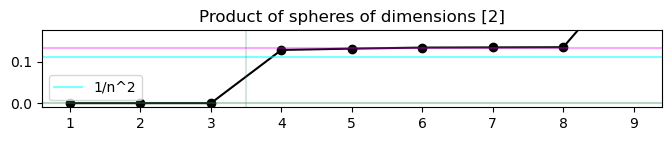

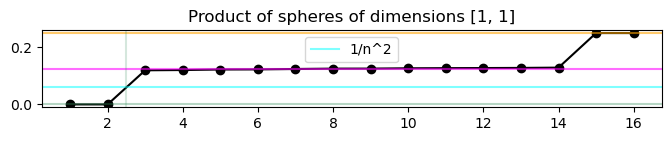

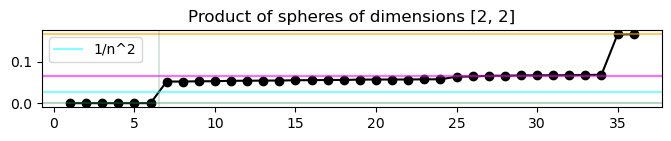

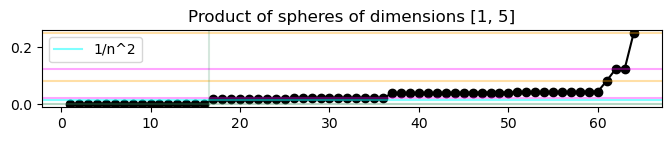

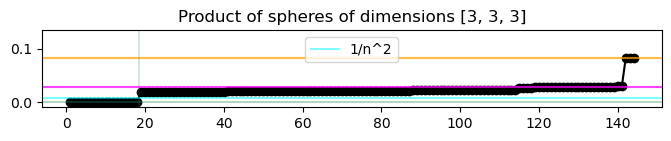

In [14]:
' Ideal Lie-PCA operator on a product of spheres '

n = 10000 #number of points to sample
Dimensions = [[2],[1,1],[2,2],[1,5],[3,3,3]]

for dimensions in Dimensions:
    # Generate sample
    ambient_dimensions = [d+1 for d in dimensions]
    ambient_dim = sum(ambient_dimensions)
    Xs = [SampleOnSphere(d,n) for d in ambient_dimensions]
    X = np.hstack(Xs)

    # Get ideal Lie-PCA operator
    ProjNormalSpaces = [scipy.linalg.block_diag(*[np.outer(X[i],X[i]) for X in Xs]) for i in range(n)]
    ProjLines = [np.outer(X[i,:],X[i,:])/np.dot(X[i,:],X[i,:]) for i in range(np.shape(X)[0])]
    Basis = []
    for i in range(ambient_dim):
        for j in range(ambient_dim):
            basis = np.zeros((ambient_dim,ambient_dim))
            basis[i,j] = 1
            Basis.append(basis)
    Sigma = np.zeros((ambient_dim**2,ambient_dim**2))
    Images = [np.sum([ProjNormalSpaces[j] @ Basis[i] @ ProjLines[j] for j in range(np.shape(X)[0])],0) for i in range(len(Basis))]
    for i in range(len(Basis)): Sigma[:,i] = Images[i].flatten()
    Sigma /= len(X)

    # Get eigenvectors
    vals, vecs = np.linalg.eig(Sigma) #finds eigenvalues and vectors of sigma as a matrix
    vals = np.real(vals)
    indices = np.argsort(vals)
    vals, vecs = [vals[i] for i in indices], list([vecs[:,i] for i in indices])

    # Plot
    plt.figure(figsize=(8,1))
    indices = range(1,ambient_dim**2+1)
    plt.plot(indices,vals,c='black', label='_nolegend_')
    plt.scatter(indices, vals,c='black', label='_nolegend_')
    plt.title('Product of spheres of dimensions '+repr(dimensions))
    plt.ylim(-0.01,0.01+1/(2*min(ambient_dimensions)))
    for d in ambient_dimensions:plt.axhline(1/(d)/len(dimensions), alpha=0.35, c='orange', label='_nolegend_')
    plt.axhline(0, alpha=0.35, c='seagreen', label='_nolegend_')
    for d in ambient_dimensions:
        delta = GetLiePCAEigenvalue(d)/len(dimensions)
        plt.axhline(delta, alpha=0.35, c='magenta', label='_nolegend_')
    delta12 = 1/ambient_dim**2
    plt.axhline(delta12, alpha=0.5, c='cyan')
    dim_kernel = sum([d*(d-1)/2 for d in ambient_dimensions])
    plt.axvline(dim_kernel+1/2, alpha=0.2, c='seagreen', label='_nolegend_')
    plt.legend(['1/n^2',])
    plt.show()

### I-5-b: Lie-PCA on a non-homogenous orbit of $\mathrm{SO}(2)$ in $\mathbb{R}^4$

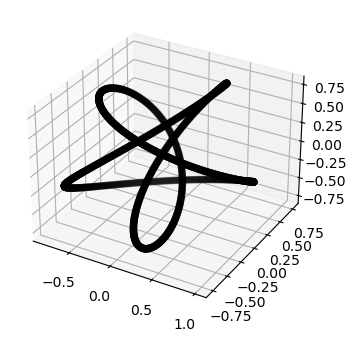

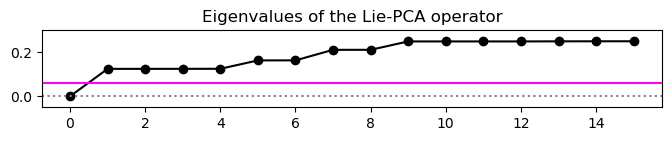

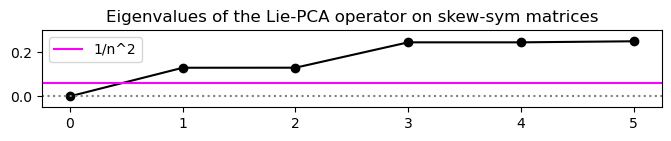

In [15]:
' Ideal Lie-PCA operator on an orbit of SO(2) in R^4 '

ambient_dim = 4
n_points = 1000
w1 = 2
w2 = 3

T = np.linspace(0,2*np.pi,n_points)
X = np.array([[np.cos(w1*t),np.sin(w1*t),np.cos(w2*t),np.sin(w2*t)] for t in T])
X = X/np.sqrt(2)
Y = np.array([[-w1*np.sin(w1*t),w1*np.cos(w1*t),-w2*np.sin(w2*t),w2*np.cos(w2*t)] for t in T])
Y = Y/np.sqrt(w1**2+w2**2)

pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();

# Compute Exact Lie-PCA operator

ProjTangentSpaces = [np.outer(Y[i],Y[i]) for i in range(n_points)]
ProjNormalSpaces = [np.eye(ambient_dim)-proj for proj in ProjTangentSpaces]
ProjLines = [np.outer(X[i,:],X[i,:])/np.dot(X[i,:],X[i,:]) for i in range(np.shape(X)[0])]
Basis = []
for i in range(ambient_dim):
    for j in range(ambient_dim):
        basis = np.zeros((ambient_dim,ambient_dim))
        basis[i,j] = 1
        Basis.append(basis)
Sigma = np.zeros((ambient_dim**2,ambient_dim**2))
Images = [np.sum([ProjNormalSpaces[j] @ Basis[i] @ ProjLines[j] for j in range(np.shape(X)[0])],0) for i in range(len(Basis))]
for i in range(len(Basis)): Sigma[:,i] = Images[i].flatten()
Sigma /= len(X)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
    #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.axhline(1/ambient_dim**2,color='magenta', label='1/n^2') 
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

# Plot Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [liedetect.matrix_manipulation.SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)
vals, vecs = np.linalg.eig(SigmaSkew); vals = np.sort(np.real(vals))
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', label='_nolegend_') 
ax.axhline(0,color='grey',linestyle='dotted', label='_nolegend_') 
ax.axhline(1/ambient_dim**2,color='magenta', label='1/n^2') 
plt.legend()
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator on skew-sym matrices'); plt.show();

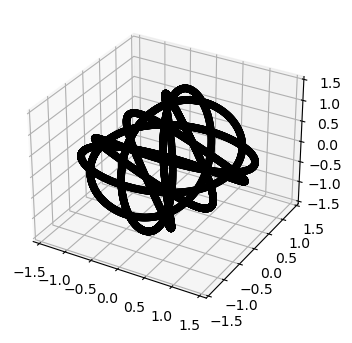

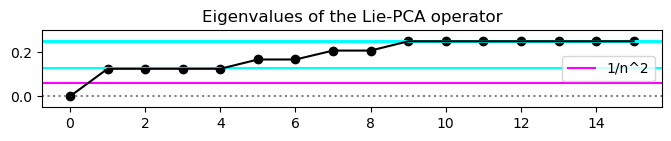

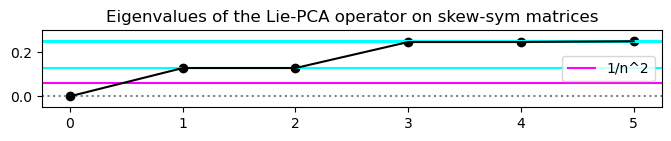

Experimental eigenvalues: [1.1102230246251565e-16, 0.12836621593841624, 0.1283905352542976, 0.24662110394829498, 0.24662196474570228, 0.2500001801132896]
Theoretical eigenvalues: 0 0.12837837837837837 0.24662162162162163 0.25


In [16]:
' Ideal Lie-PCA operator on an orbit of SO(2) in R^4 - homogenous '

# Parameters
ambient_dim = 4
n_points = 10000
w1, w2 = 5, 7    # weights
epsilon = 1        # non-homogeneity coefficient, here, is homogenous

# Generate orbit
T = np.linspace(0,2*np.pi,n_points)
X = np.array([[np.cos(w1*t),np.sin(w1*t),epsilon*np.cos(w2*t),epsilon*np.sin(w2*t)] for t in T])
# X = X/np.sqrt(1**2+epsilon**2)
Y = np.array([[-w1*np.sin(w1*t),w1*np.cos(w1*t),-epsilon*w2*np.sin(w2*t),epsilon*w2*np.cos(w2*t)] for t in T])
Y = Y/np.sqrt(w1**2+(epsilon*w2)**2)

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();

# Compute Exact Lie-PCA operator
ProjTangentSpaces = [np.outer(Y[i],Y[i]) for i in range(n_points)]
ProjNormalSpaces = [np.eye(ambient_dim)-proj for proj in ProjTangentSpaces]
ProjLines = [np.outer(X[i,:],X[i,:])/np.dot(X[i,:],X[i,:]) for i in range(np.shape(X)[0])]
Basis = []
for i in range(ambient_dim):
    for j in range(ambient_dim):
        basis = np.zeros((ambient_dim,ambient_dim))
        basis[i,j] = 1
        Basis.append(basis)
Sigma = np.zeros((ambient_dim**2,ambient_dim**2))
Images = [np.sum([ProjNormalSpaces[j] @ Basis[i] @ ProjLines[j] for j in range(np.shape(X)[0])],0) for i in range(len(Basis))]
for i in range(len(Basis)): Sigma[:,i] = Images[i].flatten()
Sigma /= len(X)

# Explicit eigenvalues of the Lie-PCA operator
eig0 = (epsilon**2/(2*(1+epsilon**2)))*(w1**2+w2**2)/(w1**2+(epsilon*w2)**2)
eig1 = (1+(w1-epsilon**2*w2)**2/((1+epsilon**2)*(w1**2+(epsilon*w2)**2)))/8
eig2 = (1+(w1+epsilon**2*w2)**2/((1+epsilon**2)*(w1**2+(epsilon*w2)**2)))/8

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.axhline(1/ambient_dim**2,color='magenta', label='1/n^2') 
ax.axhline(eig0,color='cyan', label='_nolegend_') 
ax.axhline(eig1,color='cyan', label='_nolegend_') 
ax.axhline(eig2,color='cyan', label='_nolegend_') 
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
plt.legend()
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

# Plot Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [liedetect.matrix_manipulation.SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)
vals, vecs = np.linalg.eig(SigmaSkew); ind = np.argsort(vals)
vals, vecs = [vals[i] for i in ind], [vecs[i] for i in ind]
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.axhline(0,color='grey',linestyle='dotted', label='_nolegend_') 
ax.axhline(1/ambient_dim**2,color='magenta', label='1/n^2') 
ax.axhline(eig0,color='cyan', label='_nolegend_') 
ax.axhline(eig1,color='cyan', label='_nolegend_') 
ax.axhline(eig2,color='cyan', label='_nolegend_') 
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', label='_nolegend_') 
plt.legend()
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator on skew-sym matrices'); plt.show();

# Print eigenvalues
print('Experimental eigenvalues:', vals)
print('Theoretical eigenvalues:', 0, eig1, eig2, eig0)

In [17]:
' Verify eigenvectors '

# Kernel
A = np.array([[0,-w1,0,0],[w1,0,0,0],[0,0,0,-w2],[0,0,w2,0]])
B = liedetect.matrix_manipulation.VectorToSkewSymmetric( SigmaSkew @ liedetect.matrix_manipulation.SkewSymmetricToVector(A) )
B[np.abs(B)<1e-1]=0
print('Must be zero:\n', B)

# Eig0
A = np.array([[0,-w2,0,0],[w2,0,0,0],[0,0,0,w1],[0,0,-w1,0]])
B = liedetect.matrix_manipulation.VectorToSkewSymmetric( SigmaSkew @ liedetect.matrix_manipulation.SkewSymmetricToVector(A) )
B[np.abs(B)<1e-1]=0
print('\nMust be equal:\n', A)
print('and\n', B/eig0)

# Eig1
A = np.array([[0,0,0,1],[0,0,-1,0],[0,-1,0,0],[1,0,0,0]])
B = liedetect.matrix_manipulation.VectorToSkewSymmetric( SigmaSkew @ liedetect.matrix_manipulation.SkewSymmetricToVector(A) )
B[np.abs(B)<1e-1]=0
print('\nMust be equal:\n', A)
print('and\n', B/eig1)

A = np.array([[0,0,1,0],[0,0,0,1],[-1,0,0,0],[0,-1,0,0]])
B = liedetect.matrix_manipulation.VectorToSkewSymmetric( SigmaSkew @ liedetect.matrix_manipulation.SkewSymmetricToVector(A) )
B[np.abs(B)<1e-1]=0
print('\nMust be equal:\n', A)
print('and\n', B/eig1)

# Eig2
A = np.array([[0,0,0,-1],[0,0,-1,0],[0,1,0,0],[1,0,0,0]])
B = liedetect.matrix_manipulation.VectorToSkewSymmetric( SigmaSkew @ liedetect.matrix_manipulation.SkewSymmetricToVector(A) )
B[np.abs(B)<1e-1]=0
print('\nMust be equal:\n', A)
print('and\n', B/eig2)

A = np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])
B = liedetect.matrix_manipulation.VectorToSkewSymmetric( SigmaSkew @ liedetect.matrix_manipulation.SkewSymmetricToVector(A) )
B[np.abs(B)<1e-1]=0
print('\nMust be equal:\n', A)
print('and\n', B/eig2)

Must be zero:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Must be equal:
 [[ 0 -7  0  0]
 [ 7  0  0  0]
 [ 0  0  0  5]
 [ 0  0 -5  0]]
and
 [[ 0. -7.  0.  0.]
 [ 7.  0.  0.  0.]
 [ 0.  0.  0.  5.]
 [ 0.  0. -5.  0.]]

Must be equal:
 [[ 0  0  0  1]
 [ 0  0 -1  0]
 [ 0 -1  0  0]
 [ 1  0  0  0]]
and
 [[ 0.          0.          0.          0.99987368]
 [ 0.          0.         -0.99993684  0.        ]
 [ 0.          0.99993684  0.          0.        ]
 [-0.99987368  0.          0.          0.        ]]

Must be equal:
 [[ 0  0  1  0]
 [ 0  0  0  1]
 [-1  0  0  0]
 [ 0 -1  0  0]]
and
 [[ 0.          0.          1.00028947  0.        ]
 [ 0.          0.          0.          0.9999    ]
 [-1.00028947  0.          0.          0.        ]
 [ 0.         -0.9999      0.          0.        ]]

Must be equal:
 [[ 0  0  0 -1]
 [ 0  0 -1  0]
 [ 0  1  0  0]
 [ 1  0  0  0]]
and
 [[ 0.          0.          0.         -0.99998219]
 [ 0.          0.         -1.00001507  0.        ]
 [ 

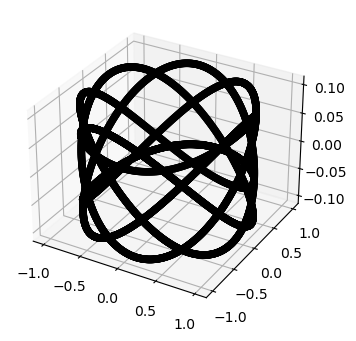

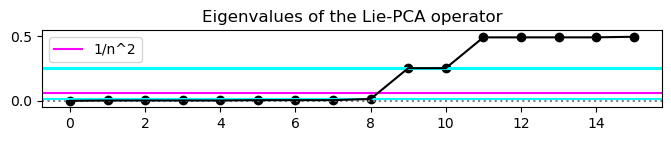

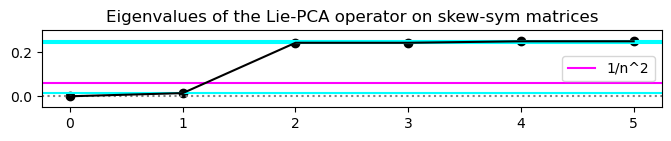

Experimental eigenvalues: [1.240327285323417e-16, 0.014371778187468705, 0.2430075382998187, 0.24300893119230907, 0.24980585416787188, 0.24980589815253224]
Theoretical eigenvalues: 0 0.24300832397872976 0.24980578677718696 0.01437177848816659


In [18]:
' Ideal Lie-PCA operator on an orbit of SO(2) in R^4 - non-homogenous '

# Parameters
ambient_dim = 4
n_points = 10000
w1, w2 = 5, 7    # weights
epsilon = 0.1    # non-homogeneity coefficient

# Generate orbit
T = np.linspace(0,2*np.pi,n_points)
X = np.array([[np.cos(w1*t),np.sin(w1*t),epsilon*np.cos(w2*t),epsilon*np.sin(w2*t)] for t in T])
# X = X/np.sqrt(1**2+epsilon**2)
Y = np.array([[-w1*np.sin(w1*t),w1*np.cos(w1*t),-epsilon*w2*np.sin(w2*t),epsilon*w2*np.cos(w2*t)] for t in T])
Y = Y/np.sqrt(w1**2+(epsilon*w2)**2)

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black'); plt.show();

# Compute Exact Lie-PCA operator
ProjTangentSpaces = [np.outer(Y[i],Y[i]) for i in range(n_points)]
ProjNormalSpaces = [np.eye(ambient_dim)-proj for proj in ProjTangentSpaces]
ProjLines = [np.outer(X[i,:],X[i,:])/np.dot(X[i,:],X[i,:]) for i in range(np.shape(X)[0])]
Basis = []
for i in range(ambient_dim):
    for j in range(ambient_dim):
        basis = np.zeros((ambient_dim,ambient_dim))
        basis[i,j] = 1
        Basis.append(basis)
Sigma = np.zeros((ambient_dim**2,ambient_dim**2))
Images = [np.sum([ProjNormalSpaces[j] @ Basis[i] @ ProjLines[j] for j in range(np.shape(X)[0])],0) for i in range(len(Basis))]
for i in range(len(Basis)): Sigma[:,i] = Images[i].flatten()
Sigma /= len(X)

# Explicit eigenvalues of the Lie-PCA operator
eig0 = (epsilon**2/(2*(1+epsilon**2)))*(w1**2+w2**2)/(w1**2+(epsilon*w2)**2)
eig1 = (1+(w1-epsilon**2*w2)**2/((1+epsilon**2)*(w1**2+(epsilon*w2)**2)))/8
eig2 = (1+(w1+epsilon**2*w2)**2/((1+epsilon**2)*(w1**2+(epsilon*w2)**2)))/8

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma); vals = np.sort(np.real(vals))
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.axhline(0,color='grey',linestyle='dotted'); 
ax.axhline(1/ambient_dim**2,color='magenta', label='1/n^2') 
ax.axhline(eig0,color='cyan', label='_nolegend_') 
ax.axhline(eig1,color='cyan', label='_nolegend_') 
ax.axhline(eig2,color='cyan', label='_nolegend_') 
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black'); 
plt.legend()
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator'); plt.show();

# Plot Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i+1,ambient_dim):
        A = np.zeros((ambient_dim,ambient_dim))
        A[i,j], A[j,i] = 1, -1
        Basis.append(A)        
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim,ambient_dim)) for A in SigmaSkew]
SigmaSkew = [liedetect.matrix_manipulation.SkewSymmetricToVector((A-A.T)/2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)
vals, vecs = np.linalg.eig(SigmaSkew); ind = np.argsort(vals)
vals, vecs = [vals[i] for i in ind], [vecs[i] for i in ind]
fig = plt.figure(figsize=(8,1)); ax = fig.add_subplot()
ax.axhline(0,color='grey',linestyle='dotted', label='_nolegend_') 
ax.axhline(1/ambient_dim**2,color='magenta', label='1/n^2') 
ax.axhline(eig0,color='cyan', label='_nolegend_') 
ax.axhline(eig1,color='cyan', label='_nolegend_') 
ax.axhline(eig2,color='cyan', label='_nolegend_') 
ax.plot(range(len(vals)),vals,c='black'); ax.scatter(range(len(vals)), vals,c='black', label='_nolegend_') 
plt.legend()
ax.set_ylim((0-0.05,max(vals)+0.05)); ax.set_title('Eigenvalues of the Lie-PCA operator on skew-sym matrices'); plt.show();

# Print eigenvalues
print('Experimental eigenvalues:', vals)
print('Theoretical eigenvalues:', 0, eig1, eig2, eig0)

# Experiments II: pixels permutations

## Experiment II-1: $\mathbb{S}^1$ action on translated gorillas

shape X: (65, 46800)


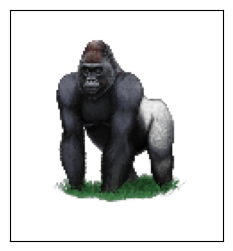

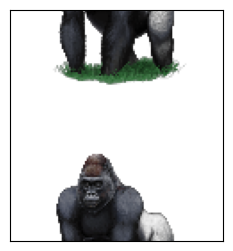

In [19]:
X = liedetect.datasets.GorillaImages(dim = 1, verbosity = 2)

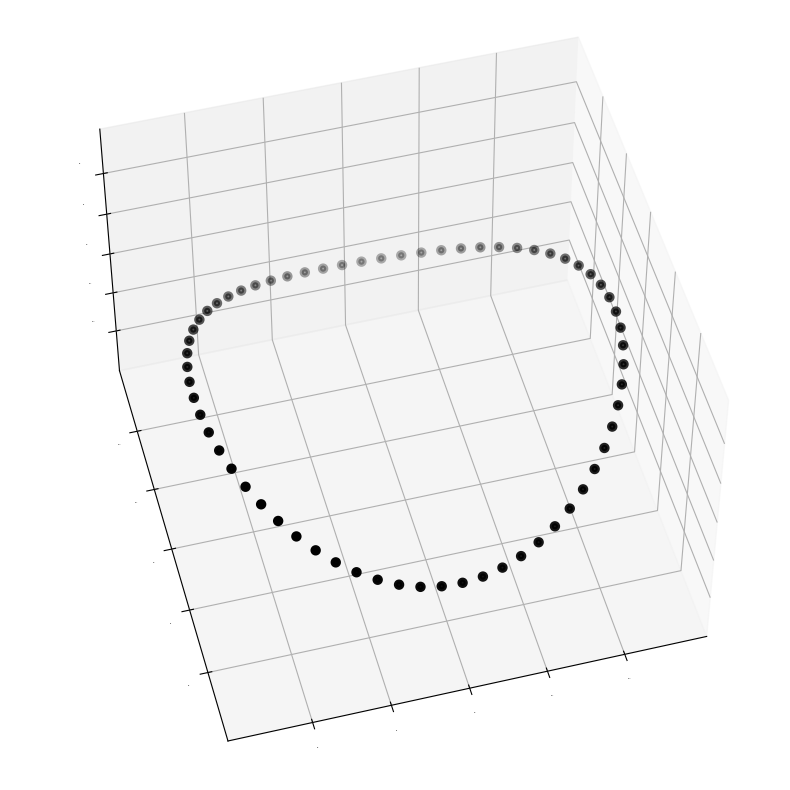

In [20]:
' Generate dataset '

# Parameters
dim = 1             # dimension of the torus (here, circle)
frequency_max = 3   # maximal angle parameter

# PCA
dim_pca = 6
ambient_dim = dim_pca
pca = sklearn.decomposition.PCA(n_components=dim_pca)
X = pca.fit_transform(X)

velour.PlotPCA(X); plt.show();

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.0007342628542556221, 0.01826014512180315, 0.018289789612086122, 0.018595731067916378]


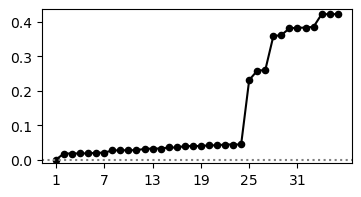

In [21]:
' Lie-PCA '

n_neighbors = 5


method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim=dim,method=method)

vals, _ = np.linalg.eig(Sigma) #finds eigenvalues and vectors of sigma as a matrix
vals = np.real(vals)
indices = np.argsort(vals)
vals = [vals[i] for i in indices]

fig = plt.figure(figsize=(4,2)); ax = fig.add_subplot()
indices = range(1,ambient_dim**2+1)
ax.plot(indices,vals,c='black', label='_nolegend_')
ax.scatter(indices, vals,c='black', label='_nolegend_', s=20)
ax.set_ylim((-0.01,max(vals)+max(vals)/30));       #modify the value '30' to add a little space above the last value on the y-axis
ax.set_xticks(range(1,len(vals),int(len(vals)/6)));  #modify the value '6' to add or remove ticks on x-axis
ax.axhline(0,color='grey',linestyle='dotted'); 
plt.show()

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 109
Normalized frequencies found in normal form decomposition: (0.278923227915642, 0.5493176839514765, 0.7876877014574396)
The optimal frequencies found is ((1, 2, 3),) with cost 0.02352865837279861
Frequencies ((1, 2, 3),) - score 0.02353 (best cost #1/109)
Frequencies ((4, 7, 10),) - score 0.03403 (best cost #2/109)
Frequencies ((3, 6, 8),) - score 0.03427 (best cost #3/109)
Frequencies ((3, 7, 10),) - score 0.04171 (best cost #4/109)
Frequencies ((3, 5, 7),) - score 0.05396 (best cost #5/109)
Frequencies ((3, 5, 8),) - score 0.05438 (best cost #6/109)
Frequencies ((2, 5, 7),) - score 0.05532 (best cost #7/109)
Frequencies ((3, 7, 9),) - score 0.05624 (best cost #8/109)
Frequencies ((2, 4, 5),) - score 0.06609 (best cost #9/109)
Frequencies ((3, 6, 10),) - score 0.07295 (best cost #10/109)
Frequencies ((4, 7, 9),) - score 0.07384 (best cost #11/109)
Frequencies ((4, 6, 9),) - score 0.07423 

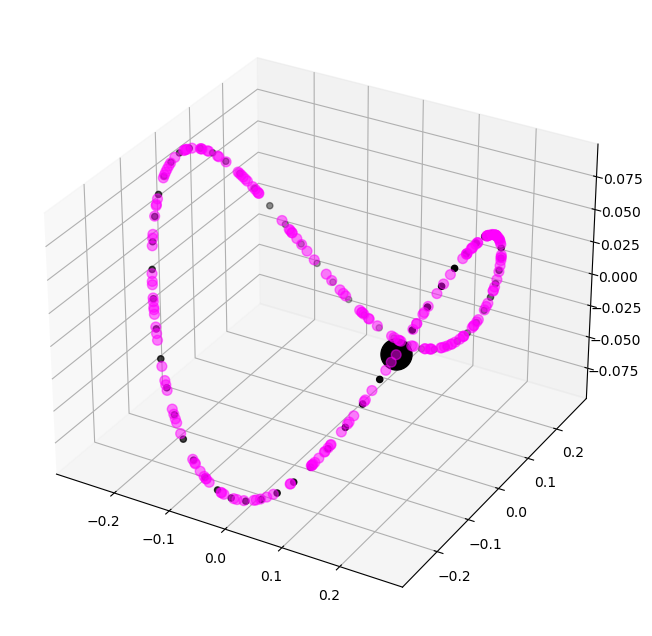

In [22]:
' Project on Lie subalgebras '

frequency_max = 10

#for method in ['Stiefel','Grassmann','NormalForm']:
for method in ['NormalForm']:
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,
                                                                                             frequency_max=frequency_max,
                                                                                             method=method, verbosity=2)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 200
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points_orbit, x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('\x1b[1;31m'+'Non-symmetric Hausdorff distance from X to estimated orbit:', Hausdorff,'\x1b[0m')
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    print('Non-symmetric Hausdorff distance from estimated orbit to X:', Hausdorff)

    # Plot dataset
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=500)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',s=50,alpha=0.5); plt.savefig('gorilla_output.png'); plt.show();
   

## Experiment II-3: $\mathbb{T}^2$ action on translated gorillas

shape X: (65, 60, 46800)


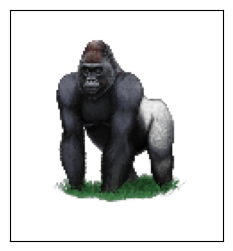

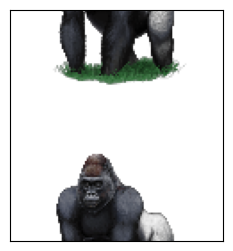

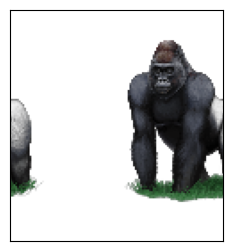

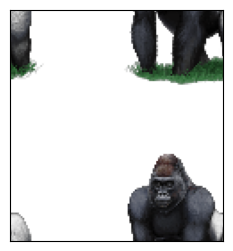

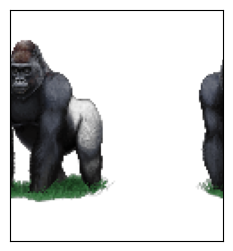

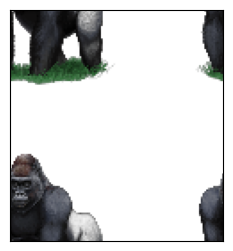

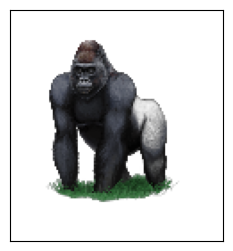

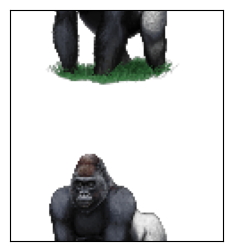

In [23]:
X = liedetect.datasets.GorillaImages(dim = 2, verbosity = 2)

Rips Complex is of dimension 2 - 1154400 simplices - 3900 vertices. Filtration maximal value is 0.15.


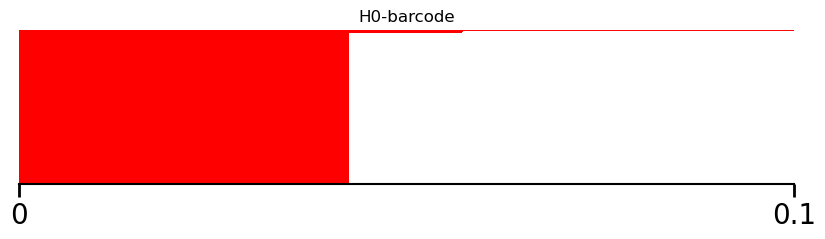

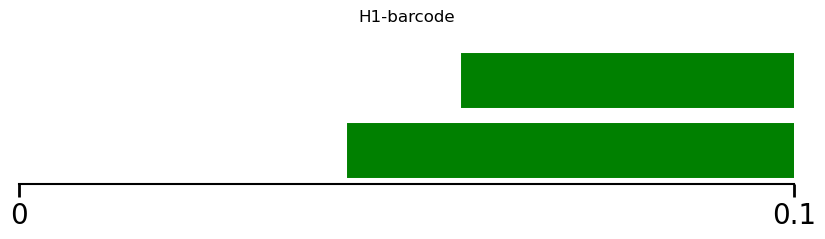

In [24]:
' Persistent homology '

# Rips filtration
dimension_max = 2  
st = velour.RipsComplex(X, filtration_max = 0.15, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=0.15, d=dimension_max-1, eps=0.03, homology_coeff_field=2)         #persistence of Rips filtration

PCA explained variance: [0.15163591 0.15163591 0.09496319 0.09496319 0.0718314  0.0718314 ]


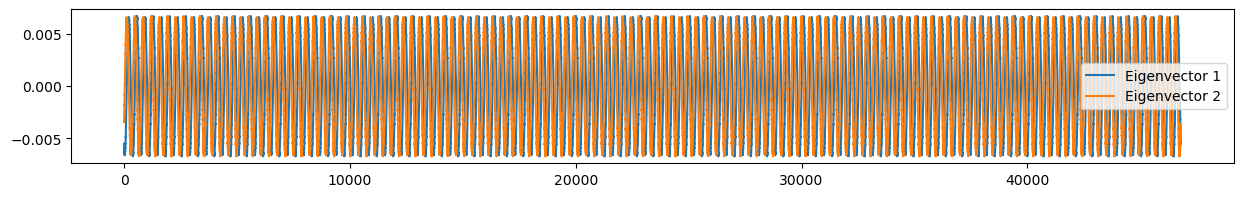

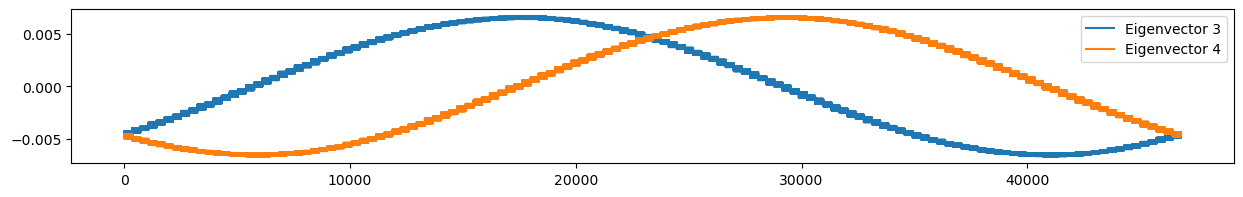

In [25]:
' Plot the eigenvectors of PCA '

n = 6

pca = sklearn.decomposition.PCA(n_components=n); pca.fit(X)
print('PCA explained variance:', pca.explained_variance_ratio_)

for I in range(2):
    plt.figure(figsize=(15,2))
    for i in range(2): plt.plot(pca.components_[2*I+i])
    plt.legend(['Eigenvector '+repr(2*I+1),'Eigenvector '+repr(2*I+2)])

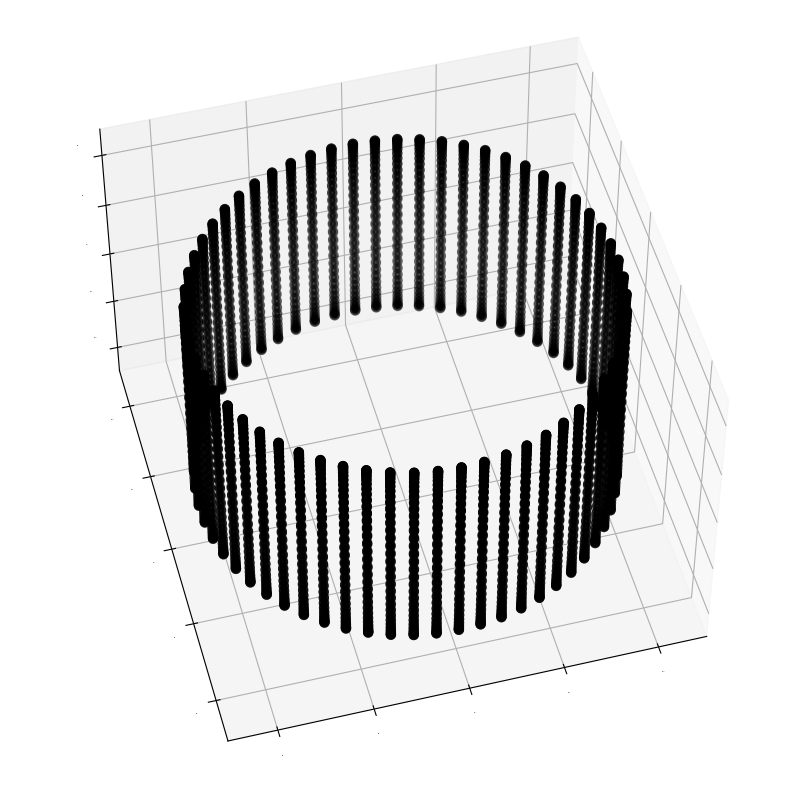

In [26]:
' Generate dataset '

# Parameters
dim = 2             # dimension of the torus (here, circle)
frequency_max = 4   # maximal angle parameter

# PCA
dim_pca = 6
ambient_dim = dim_pca
pca = sklearn.decomposition.PCA(n_components=dim_pca)
X = pca.fit_transform(X)

# Plot PCA
velour.PlotPCA(X); plt.show();

In [27]:
' Lie-PCA '

n_neighbors = 15

method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors, dim,method=method)

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [1.7924337379462782e-14, 8.17162533493745e-07, 0.061702717400394964, 0.061703641119045166]


In [28]:
vals, vecs = np.linalg.eig(Sigma) #find eigenvalues and vectors of sigma as a matrix
vals = np.real(vals)
indices = np.argsort(vals)
vals, vecs = [vals[i] for i in indices], [vecs[:,i] for i in indices]

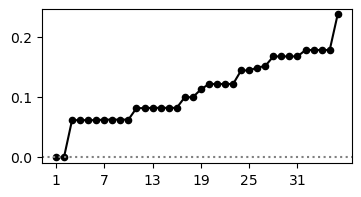

In [29]:
fig = plt.figure(figsize=(4,2)); ax = fig.add_subplot()
indices = range(1,ambient_dim**2+1)
ax.plot(indices,vals,c='black', label='_nolegend_')
ax.scatter(indices, vals,c='black', label='_nolegend_', s=20)
ax.set_ylim((-0.01,max(vals)+max(vals)/30));       #modify the value '30' to add a little space above the last value on the y-axis
ax.set_xticks(range(1,len(vals),int(len(vals)/6)));  #modify the value '6' to add or remove ticks on x-axis
ax.axhline(0,color='grey',linestyle='dotted'); 
plt.show()

----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 142
Test commutation: 2.367179511529684e-05
Normalized frequencies found in normal form decomposition: ((-0.36374930619732443, 0.5702122641502728, 0.2062629773983489), (0.4483499981261219, 0.09097656147667303, 0.5391711641059438))
There are 6816 expanded frequencies to test, out of 142
The optimal frequencies found is ((0, 1, 1), (1, -3, -2)) with cost 0.00029243798815983254
Frequencies ((0, 1, 1), (1, -3, -2)) - score 0.00029 (best cost #1/142)
Frequencies ((1, 2, 3), (-3, 3, -1)) - score 0.18703 (best cost #2/142)
Frequencies ((1, 1, 2), (-3, 3, -1)) - score 0.1904 (best cost #3/142)
Frequencies ((0, 1, 1), (3, -3, 1)) - score 0.19778 (best cost #4/142)
Frequencies ((1, 2, 3), (-3, 3, 1)) - score 0.20116 (best cost #5/142)
Frequencies ((1, 2, 3), (-3, 2, -2)) - score 0.20905 (best cost #6/142)
Frequencies ((0, 2, 3), (3, -2, 1)) - score 0.2268 (best cost #7/142)
Frequencies ((0, 2, 3), (2, 

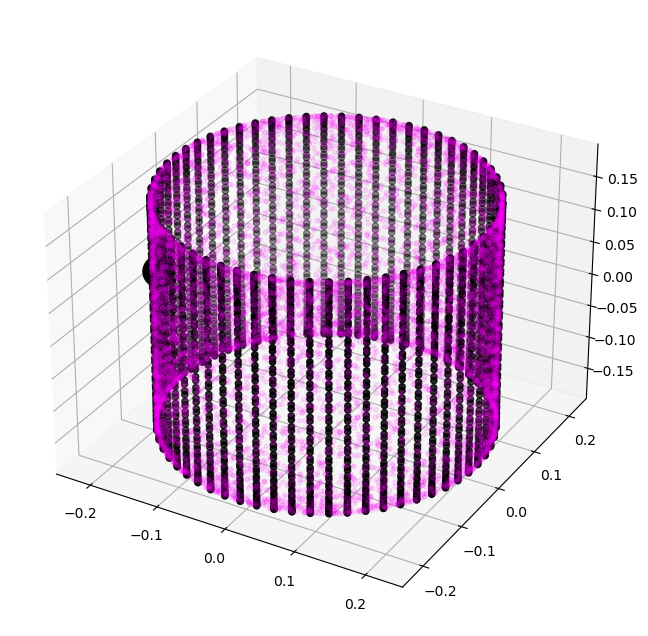

In [30]:
' Project on Lie subalgebras '
dim = 2            
frequency_max = 3

for method in ['NormalForm']:
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,
                                                                                             frequency_max=frequency_max,
                                                                                             method=method, verbosity=2)
    # Generate estimated orbit
    n_points_orbit = 100
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points_orbit, x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('\x1b[1;31m'+'Non-symmetric Hausdorff distance from X to estimated orbit:', Hausdorff,'\x1b[0m')
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    print('Non-symmetric Hausdorff distance from estimated orbit to X:', Hausdorff)

    # Plot dataset
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=500)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',s=10,alpha=0.1); plt.show();

## Experiment II-4: $\mathbb{S}^1$ action on arrows

In [31]:
X = liedetect.datasets.ArrowImages(save = True)

PCA explained variance: [0.13689125 0.13686211 0.07483937 0.07481886 0.0743914  0.0743805
 0.07042581 0.07035384 0.02241529 0.02239859]


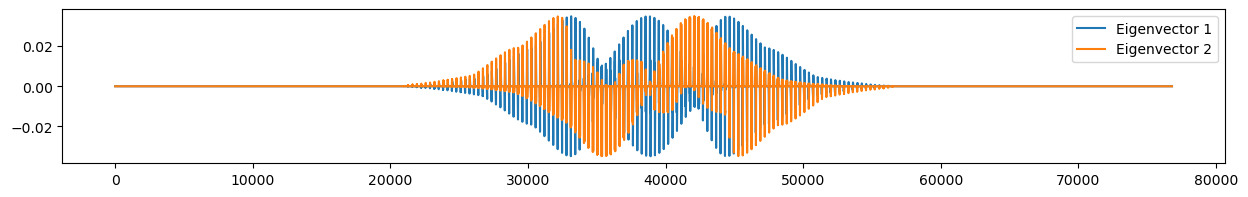

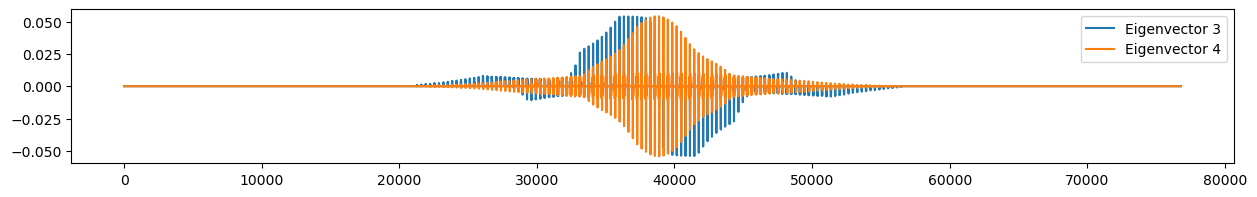

In [32]:
' Plot the eigenvectors of PCA '

n = 10

pca = sklearn.decomposition.PCA(n_components=n); pca.fit(X)
print('PCA explained variance:', pca.explained_variance_ratio_)

for I in range(2):
    plt.figure(figsize=(15,2))
    for i in range(2): plt.plot(pca.components_[2*I+i])
    plt.legend(['Eigenvector '+repr(2*I+1),'Eigenvector '+repr(2*I+2)])

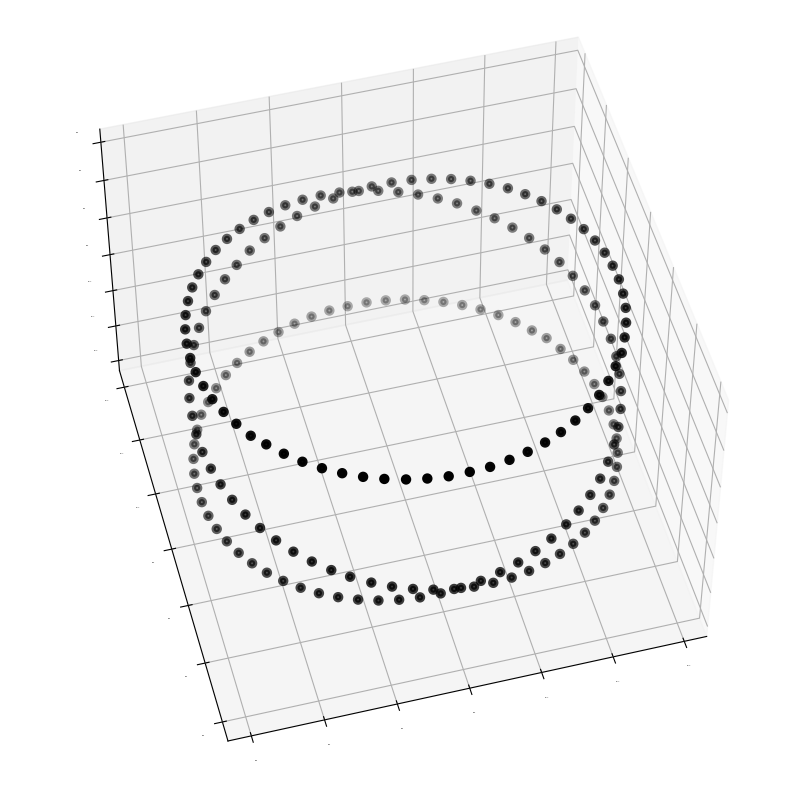

In [33]:
' Generate dataset '

# Parameters
dim = 1             # dimension of the torus (here, circle)
frequency_max = 6   # maximal angle parameter

# PCA
dim_pca = 8
ambient_dim = dim_pca
pca = sklearn.decomposition.PCA(n_components=dim_pca)
X = pca.fit_transform(X)


# Plot PCA
velour.PlotPCA(X); plt.show();

In [34]:
' Lie-PCA '

n_neighbors = 5

method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim,method=method)

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.00036301394431079344, 0.04368207620598917, 0.043932394727762045, 0.051106244184760875]


----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 1325
Normalized frequencies found in normal form decomposition: (0.1630614117818317, 0.3254824952295276, 0.4846897539462451, 0.7953288399815542)
The optimal frequencies found is ((1, 2, 3, 5),) with cost 0.009092258978680337
Frequencies ((1, 2, 3, 5),) - score 0.00909 (best cost #1/1325)
Frequencies ((3, 6, 9, 14),) - score 0.02469 (best cost #2/1325)
Frequencies ((3, 5, 8, 13),) - score 0.02873 (best cost #3/1325)
Frequencies ((3, 6, 8, 14),) - score 0.03392 (best cost #4/1325)
Frequencies ((2, 5, 7, 12),) - score 0.03544 (best cost #5/1325)
Frequencies ((2, 5, 7, 11),) - score 0.04082 (best cost #6/1325)
Frequencies ((3, 6, 10, 15),) - score 0.04139 (best cost #7/1325)
Frequencies ((3, 6, 8, 13),) - score 0.04165 (best cost #8/1325)
Frequencies ((3, 5, 7, 12),) - score 0.04178 (best cost #9/1325)
Frequencies ((2, 4, 6, 9),) - score 0.04246 (best cost #10/1325)
Frequencies ((2, 5, 8, 13),) -

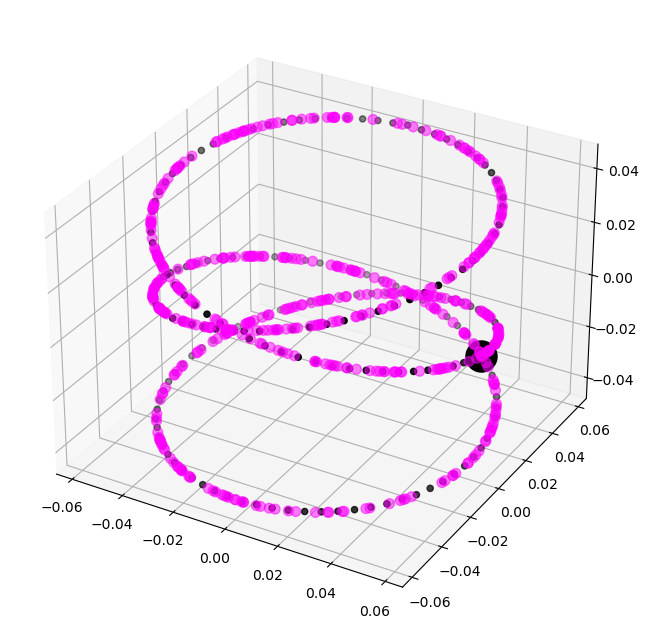

In [35]:
' Project on Lie subalgebras '

dim = 1            
frequency_max = 15

for method in ['NormalForm']:
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,
                                                                                             frequency_max=frequency_max,
                                                                                             method=method, verbosity=2)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points_orbit, x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('\x1b[1;31m'+'Non-symmetric Hausdorff distance from X to estimated orbit:', Hausdorff,'\x1b[0m')
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    print('Non-symmetric Hausdorff distance from estimated orbit to X:', Hausdorff)

    # Plot dataset
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=500)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',s=50,alpha=0.5); plt.show();

## Experiment II-4: Rotated MNIST

In [36]:
number_of_rotations = 200
size_train = 1000
size_test = 100

X_train, y_train, X_test, y_test = liedetect.datasets.RotMNIST(number_of_rotations = number_of_rotations, 
                                                               size_train = size_train, size_test = size_test)

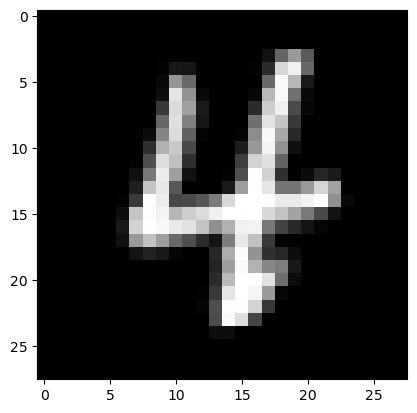

In [37]:
plt.imshow(X_train[0], cmap=plt.cm.gray)
plt.show()

In [38]:
X_train[:number_of_rotations].shape

(200, 28, 28)

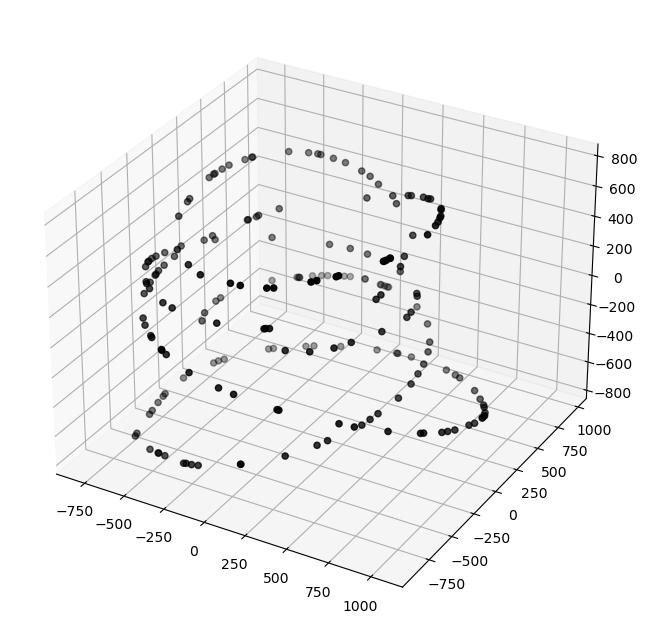

In [39]:
X = X_train[:number_of_rotations].reshape(number_of_rotations, 28*28)
Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black')
plt.show()

In [40]:
X =  X/max([np.linalg.norm(X[i]) for i in range(np.shape(X)[0])])

In [41]:
# Parameters
dim = 1             # dimension of the torus (here, circle)
frequency_max = 5  # maximal angle parameter

# PCA
dim_pca = 6
ambient_dim = dim_pca
pca = sklearn.decomposition.PCA(n_components=dim_pca)
X = pca.fit_transform(X)

In [42]:
' Lie-PCA '

n_neighbors = 5

method='localPCA'
Sigma = liedetect.lie_optimization.GetLiePCAOperator(X,n_neighbors,dim,method=method)

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [0.025127751205941323, 0.045652285775807475, 0.04669887577318493, 0.05150405166751945]


----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 10
Normalized frequencies found in normal form decomposition: (0.13921235028830586, 0.45927234566907016, 0.8773191175569105)
The optimal frequencies found is ((1, 3, 5),) with cost 0.06488831632750888
Frequencies ((1, 3, 5),) - score 0.06489 (best cost #1/10)
Frequencies ((1, 2, 4),) - score 0.08236 (best cost #2/10)
Frequencies ((1, 2, 5),) - score 0.10956 (best cost #3/10)
Frequencies ((1, 2, 3),) - score 0.16663 (best cost #4/10)
Frequencies ((1, 3, 4),) - score 0.16888 (best cost #5/10)
Frequencies ((1, 4, 5),) - score 0.1907 (best cost #6/10)
Frequencies ((2, 3, 5),) - score 0.19861 (best cost #7/10)
Frequencies ((2, 4, 5),) - score 0.24788 (best cost #8/10)
Frequencies ((2, 3, 4),) - score 0.28561 (best cost #9/10)
Frequencies ((3, 4, 5),) - score 0.34864 (best cost #10/10)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.4077077461865999 
Non-symmetric Hausdorff distance f

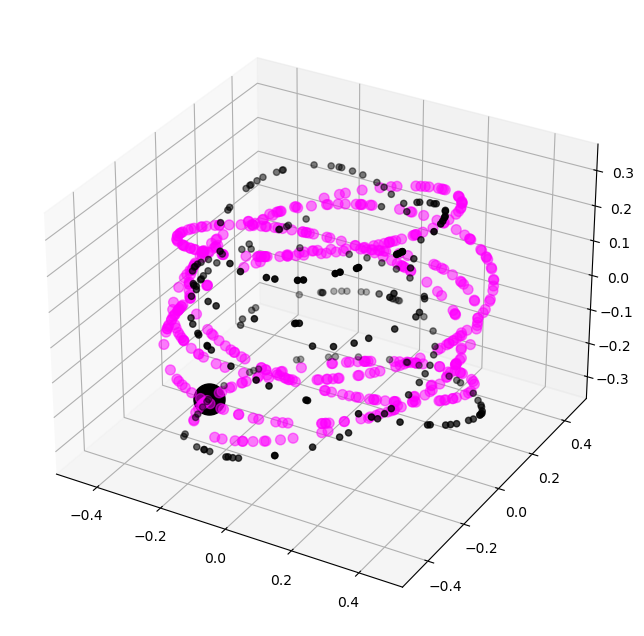

In [43]:
' Project on Lie subalgebras '
for method in ['NormalForm']:
    OptimalFrequencies, OptimalLieAlgebra = liedetect.lie_optimization.FindClosestLieAlgebra('torus', Sigma,dim,ambient_dim,
                                                                                             frequency_max=frequency_max,
                                                                                             method=method, verbosity=2)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.lie_optimization.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points_orbit, x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('\x1b[1;31m'+'Non-symmetric Hausdorff distance from X to estimated orbit:', Hausdorff,'\x1b[0m')
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    print('Non-symmetric Hausdorff distance from estimated orbit to X:', Hausdorff)

    # Plot dataset
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=500)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',s=50,alpha=0.5); plt.show();

# Experiments III - Harmonic analysis

## Experiment III: Gorilla with filter

shape X: (65, 60, 46800)


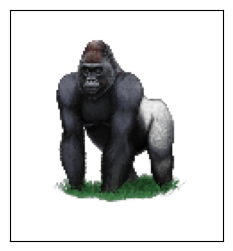

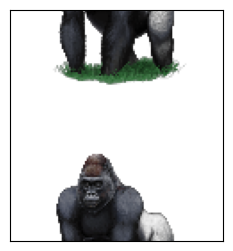

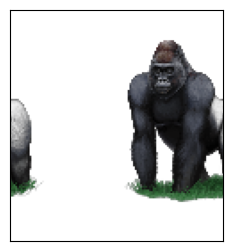

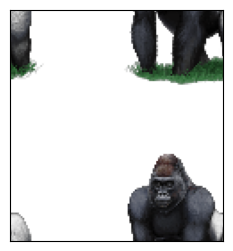

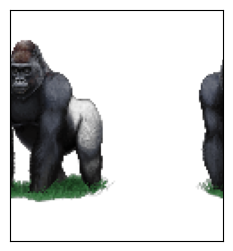

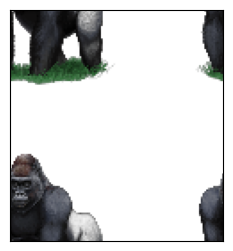

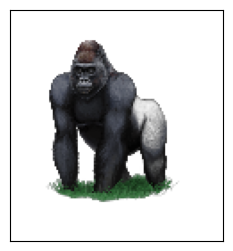

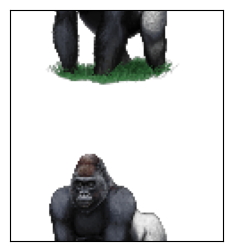

In [44]:
X = liedetect.datasets.GorillaImages(dim = 2, verbosity = 2)

In [45]:
shape = tuple([130, 120, 3])
X = X.reshape(65,60,-1)

def gaussian_filter(shape = shape, sigma = np.eye(2), plot = True):
    '''
    Creates a Gaussian filter os parameter sigma
    '''
    gs = np.ones(shape)
    mean = np.array([shape[0]/2, shape[1]/2])
    sigma_inv = np.linalg.inv(sigma)
    for i in range(130):
        for j in range(120):
            gs[i, j, :] =  np.exp(-1/2*(np.array([i,j])-mean).T@sigma_inv@(np.array([i,j])-mean))
    if plot:
        plt.imshow(gs)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.show()

    return gs

In [46]:
#makes the convolution of the signal (images) and the filter, which will be the dataset of interest
gs = gaussian_filter(sigma = 500*np.array([[1,0.7],[0.7,1]]), plot =  False) #defines the filter
frame = np.zeros((X.shape[:2]))
for i in range(-int(X.shape[0]/2), int(X.shape[0]/2)+1): #we go from negative to positive values so that
    for j in range(-int(X.shape[1]/2), int(X.shape[1]/2)): #the gorilla head is at (0,0) when centered
        frame[i,j] = sum(sum(sum(X[i+int(X.shape[0]/2),j+int(X.shape[1]/2),:].reshape(shape)*gs)))

In [47]:
def func_2D(beta, i, j, max_freq_fourrier, l, N_1, N_2):
    '''
    Defines a regressor for a 2D regression problem
    '''
    return sum([beta[l.index(str(n) + ' ' + str(m))]*np.exp(2*np.pi*n*1j*i/N_1)*np.exp(2*np.pi*m*1j*j/N_2) for n in range(-max_freq_fourrier, max_freq_fourrier + 1) for m in range(-max_freq_fourrier, max_freq_fourrier + 1)])[0]

def regression(X, y, N_1 = 65, N_2 = 60, max_freq_fourrier = 10):
    '''
    Performs the regression itself using the harmonic analysis decomposition
    '''
    N = X.shape[0]
    shape_transforms =  (N, (2*max_freq_fourrier + 1)**2)
    transform = np.ones(shape_transforms, dtype=np.complex_)
    for i in range(N):
        transform[i] =  np.array([np.exp(2*np.pi*n*1j*X[i][0]/N_1)*np.exp(2*np.pi*m*1j*X[i][1]/N_2) for n in range(-max_freq_fourrier, max_freq_fourrier + 1) for m in range(-max_freq_fourrier, max_freq_fourrier + 1)])
    transform_conj = transform.conjugate().T
    betas = np.linalg.pinv(transform_conj@transform)@transform_conj@y.reshape(N, 1)
    
    return betas

def predict(X, betas, N_1 = 65, N_2 = 60, max_freq_fourrier = 10):
    '''
    Predict the regression results
    '''
    l = [str(n) + ' ' + str(m) for n in range(-max_freq_fourrier, max_freq_fourrier + 1) for m in range(-max_freq_fourrier, max_freq_fourrier + 1)]
    
    prev = []
    for el in X:
        prev.append(func_2D(betas, el[0], el[1], max_freq_fourrier, l, N_1, N_2))
    return prev

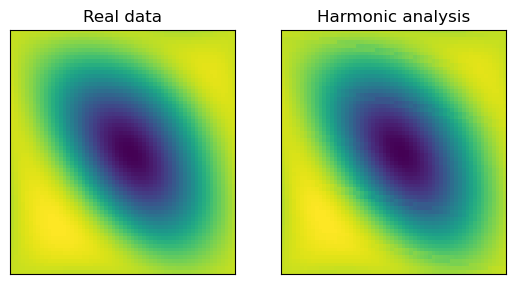

Error:  0.020569503461419378


In [48]:
N_1, N_2 = 65, 60 #creates the input data being the pixel locations
X = [(i,j) for i in range(N_2) for j in range(N_1)]
X = np.array(X)
y = frame.reshape(-1) #reshape the unknown to be a vector

from sklearn.model_selection import train_test_split #splits data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

beta = regression(X_train, y_train, N_1 = 65, N_2 = 60, max_freq_fourrier = 10) #estimate betas
prev_all = predict(X, beta) #makes the predictions

fig, axs = plt.subplots(1,2) #compares model predictions with actual data
axs[0].imshow(np.real(frame))
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
axs[0].set_title('Real data')

axs[1].imshow(np.real(np.array(prev_all)).reshape(65,60))
axs[1].set_title('Harmonic analysis')
axs[1].get_xaxis().set_ticks([])
axs[1].get_yaxis().set_ticks([])
plt.show()
print('Error: ', sum((np.real(np.array(predict(X_test, beta)))-y_test)**2)/len(y_test))

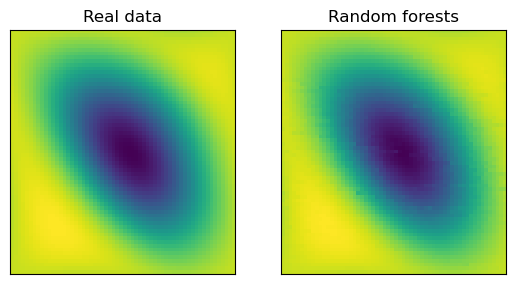

Error:  0.09336257165762804


In [49]:
#implements random forest to solve the problem
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state = 42)
regr.fit(X_train, y_train)


fig, axs = plt.subplots(1,2) #compares model predictions with actual data
axs[0].imshow(np.real(frame))
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
axs[0].set_title('Real data')

axs[1].imshow(regr.predict(X).reshape(65,60))
axs[1].set_title('Random forests')
axs[1].get_xaxis().set_ticks([])
axs[1].get_yaxis().set_ticks([])
plt.show()

print('Error: ', sum((regr.predict(X_test)-y_test)**2)/len(y_test))

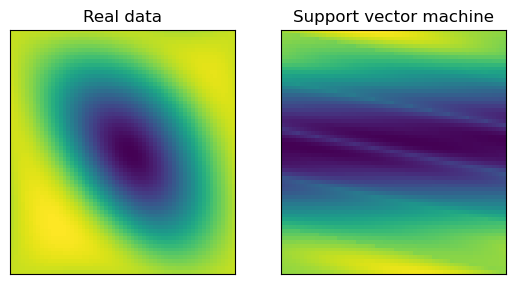

Error:  24.906809598039217


In [50]:
#implements support vector machines to solve the problem, with grid search
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


param_grid = {
    "SVR__C": [0.1, 1, 10, 100, 1000],
    "SVR__epsilon": [0.1, 0.2, 0.5, 1],
}

regr = Pipeline(steps = [('scaler', StandardScaler()), ('SVR',SVR())])
grid = GridSearchCV(regr, param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)


fig, axs = plt.subplots(1,2) #compares model predictions with actual data
axs[0].imshow(np.real(frame))
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
axs[0].set_title('Real data')

axs[1].imshow(grid.predict(X).reshape(65,60))
axs[1].set_title('Support vector machine')
axs[1].get_xaxis().set_ticks([])
axs[1].get_yaxis().set_ticks([])
plt.show()

print('Error: ', sum((grid.predict(X_test)-y_test)**2)/len(y_test))

In [51]:
import tensorflow as tf

def feedforward(number_of_layers, neurons_per_hidden_layer, activation, inputs_shape = 2):
    '''
    This function creates a simple feedforward neural network
    Input: number_of_layers: number of hidden layers in the network; neurons_per_hidden_layer: width of each hidden layer, which must be the
    same for all layers; activation: activation function for each hidden layer, which must be the same; inputs_shape = 3: shape of input
    set to 3 by default
    Output model of the neural network
    '''
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(inputs_shape,)))
    for i in range(number_of_layers):
        model.add(tf.keras.layers.Dense(neurons_per_hidden_layer, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    return model

def trains_network(model, number_of_epochs, data, target, verbose = 2, plot = False):
    '''
    Splits the dataset into train and validation and trains neurak network
    Input: model: the neural network to be trained; number_of_epochs: number of training epochs; data: dataset; target: dataset's labels;
    verbose = 2: verbose in training history;
    plot == False: if True, plots the training history
    '''
    X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.1, random_state = 42)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
    history = model.fit(X_train, y_train, epochs = number_of_epochs, validation_data = (X_val, y_val), batch_size=32, callbacks=[callback],
                        verbose = verbose)
    model.evaluate(data, target)
    
    if plot == True:
        plt.plot(history.history['val_loss'])
    return 

Epoch 1/100
99/99 - 1s - loss: 680.6465 - mean_squared_error: 680.6465 - val_loss: 537.6177 - val_mean_squared_error: 537.6177 - 1s/epoch - 12ms/step
Epoch 2/100
99/99 - 0s - loss: 348.1182 - mean_squared_error: 348.1182 - val_loss: 198.6264 - val_mean_squared_error: 198.6264 - 221ms/epoch - 2ms/step
Epoch 3/100
99/99 - 0s - loss: 131.3202 - mean_squared_error: 131.3202 - val_loss: 115.7615 - val_mean_squared_error: 115.7615 - 183ms/epoch - 2ms/step
Epoch 4/100
99/99 - 0s - loss: 111.1017 - mean_squared_error: 111.1017 - val_loss: 112.6135 - val_mean_squared_error: 112.6135 - 204ms/epoch - 2ms/step
Epoch 5/100
99/99 - 0s - loss: 109.3883 - mean_squared_error: 109.3883 - val_loss: 110.6053 - val_mean_squared_error: 110.6053 - 207ms/epoch - 2ms/step
Epoch 6/100
99/99 - 0s - loss: 108.0313 - mean_squared_error: 108.0313 - val_loss: 109.3870 - val_mean_squared_error: 109.3870 - 196ms/epoch - 2ms/step
Epoch 7/100
99/99 - 0s - loss: 106.7928 - mean_squared_error: 106.7928 - val_loss: 107.403

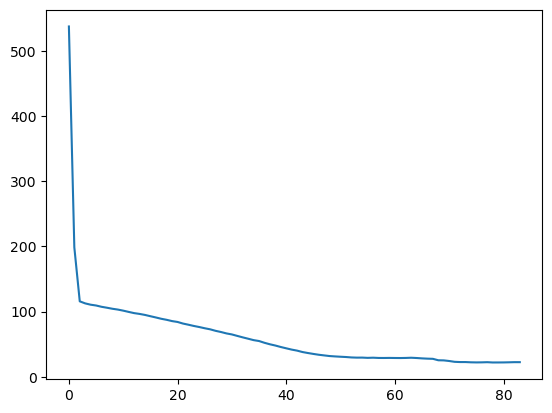

In [52]:
model = feedforward(2,3,'relu')
trains_network(model,100, X_train, y_train, plot= True )

122/122 [==============================] - 0s 1ms/step


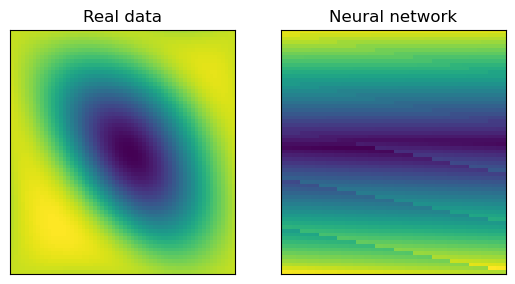

13/13 [==============================] - 0s 1ms/step
Error:  24.87846631200806


In [53]:
fig, axs = plt.subplots(1,2) #compares model predictions with actual data
axs[0].imshow(np.real(frame))
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
axs[0].set_title('Real data')

axs[1].imshow(model.predict(X).reshape(65, 60))
axs[1].set_title('Neural network')
axs[1].get_xaxis().set_ticks([])
axs[1].get_yaxis().set_ticks([])
plt.show()

print('Error: ', sum((model.predict(X_test).reshape(-1)-y_test)**2)/len(y_test))

# Experiments IV- Hamiltonian systems

## Experiment IV-I - Double harmonic oscillator

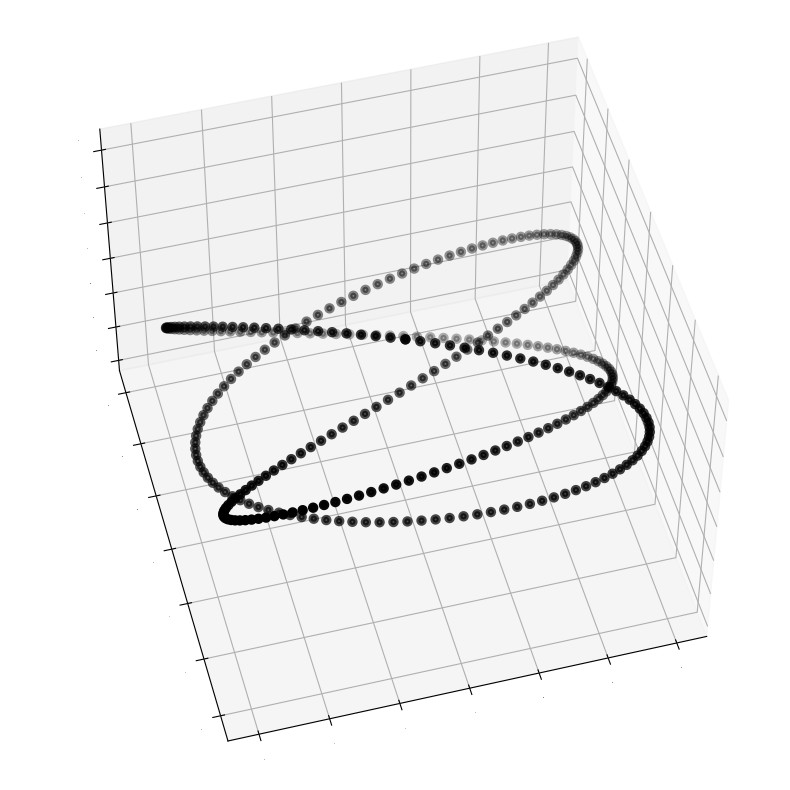

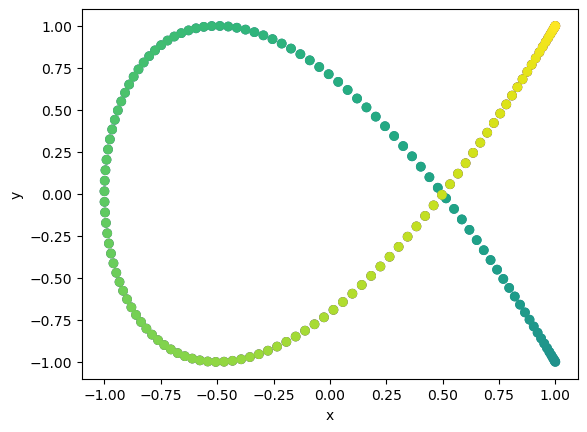

In [54]:
def oscillator(N = 300, k1 = 1, k2 = 2, t_max = 3*2*np.pi, x0 = 1, y0 = 1):
    '''
    Makes data for a simulation of two dimensional harmonic oscillator, 
    with N points, and coeficients k1 and k2. The system is released from (x0,y0)
    '''
    t = np.linspace(0, t_max, N)
    
    data = np.zeros((N, 4))
    
    data[:,0] = x0*np.cos(k1*t)
    data[:,1] = -k1*np.sin(k1*t)
    
    data[:,2] = y0*np.cos(k2*t)
    data[:,3] = -k2*np.sin(k2*t)
    
    return data

#makes an oscillator of coefficients k1 = 2 and k2 = 3
X = oscillator(k1 = 2, k2 = 3)
velour.PlotPCA(X); plt.show();


#plots x and y coordinates of the double oscillator
plot_position_data = oscillator(k1 = 2, k2 = 3, t_max = 2*np.pi)

plt.scatter(plot_position_data[:,0], plot_position_data[:,2] , 
            cmap = 'viridis', c = range(len(plot_position_data)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

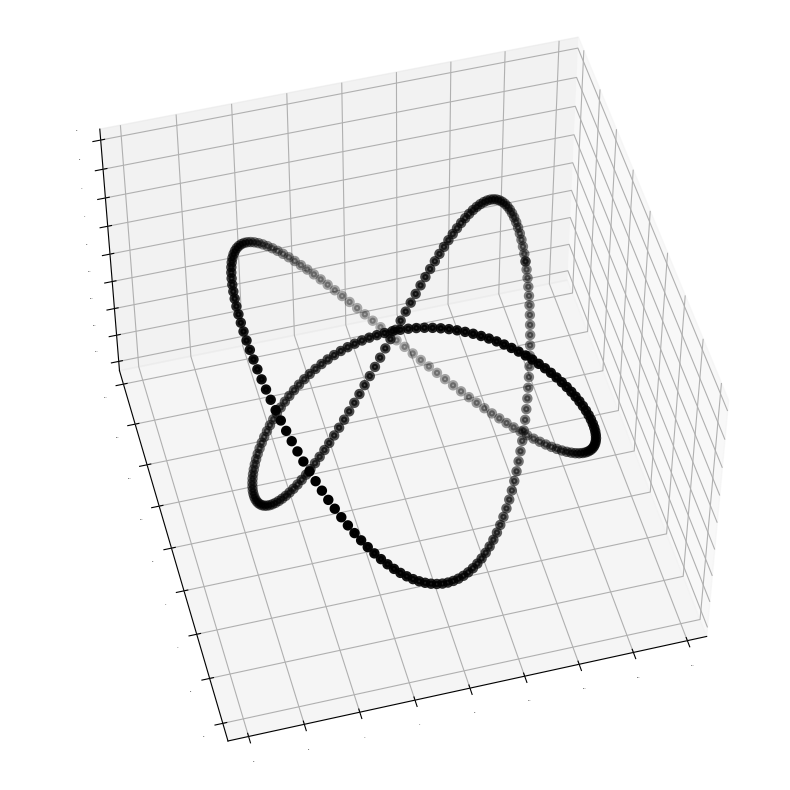

In [55]:
#applies Step 1 to the data set 

_, M = liedetect.FastMatrixOptimization.project_sphere(X)
X = (M @ X.transpose()).transpose()
velour.PlotPCA(X); plt.show();

----> Lie PCA with localPCA estimation of tangent spaces <----
First eigenvalues: [4.63962992880429e-06, 0.12392993358538802, 0.1250940480081112, 0.12520978526406246]
----> Optimization problem via NormalForm for torus group <----
Number of frequencies to test: 9
Normalized frequencies found in normal form decomposition: (0.557216460682282, 0.8303672777420308)
The optimal frequencies found is ((2, 3),) with cost 0.0030272316858161712
Frequencies ((2, 3),) - score 0.00303 (best cost #1/9)
Frequencies ((3, 5),) - score 0.0506 (best cost #2/9)
Frequencies ((3, 4),) - score 0.05247 (best cost #3/9)
Frequencies ((4, 5),) - score 0.08369 (best cost #4/9)
Frequencies ((1, 2),) - score 0.1273 (best cost #5/9)
Frequencies ((2, 5),) - score 0.21013 (best cost #6/9)
Frequencies ((1, 3),) - score 0.26847 (best cost #7/9)
Frequencies ((1, 4),) - score 0.34433 (best cost #8/9)
Frequencies ((1, 5),) - score 0.3911 (best cost #9/9)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.16702226

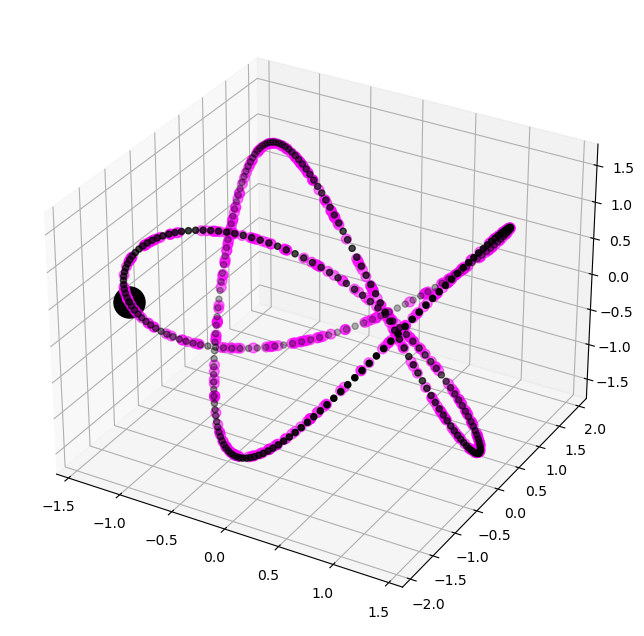

In [56]:
' Lie-PCA '

n_neighbors = 10
dim = 1            

method='localPCA'
Sigma = liedetect.GetLiePCAOperator(X,n_neighbors,dim,method=method)

' Project on Lie subalgeabrs '

frequency_max = 5

for method in ['NormalForm']:
    OptimalFrequencies, OptimalLieAlgebra = liedetect.FindClosestLieAlgebra('torus', Sigma, dim,frequency_max=frequency_max,
                                                                                             method=method, verbosity=2)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 500
    x = X[0,:] #initial point of X
    Orbit = liedetect.GenerateOrbitTorus(OptimalLieAlgebra, OptimalFrequencies, n_points_orbit, x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('\x1b[1;31m'+'Non-symmetric Hausdorff distance from X to estimated orbit:', Hausdorff,'\x1b[0m')
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    print('Non-symmetric Hausdorff distance from estimated orbit to X:', Hausdorff)

    # Plot dataset
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:,0], Xpca[:,1], Xpca[:,2], c='black');
    ax.scatter(Xpca[0,0], Xpca[0,1], Xpca[0,2],c='black', s=500)

    # Plot estimated orbit
    Orbitpca = pca.transform(Orbit)
    ax.scatter(Orbitpca[:,0], Orbitpca[:,1], Orbitpca[:,2],c='magenta',s=50,alpha=0.5); plt.show();